### TASK 1

Importing all used modules and reading in the contents of the Nexoid medical dataset:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

#read the Nexoid medical dataset
data = pd.read_excel('nexoid.xlsx')

#show all column information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   survey_date             5789 non-null   object 
 1   region                  1562 non-null   object 
 2   country                 5786 non-null   object 
 3   ip_latitude             5789 non-null   float64
 4   ip_longitude            5789 non-null   float64
 5   gender                  5789 non-null   object 
 6   age                     5789 non-null   object 
 7   height                  5789 non-null   int64  
 8   weight                  5789 non-null   int64  
 9   bmi                     5789 non-null   float64
 10  blood_type              5689 non-null   object 
 11  insurance               4497 non-null   object 
 12  income                  4636 non-null   object 
 13  smoking                 5753 non-null   object 
 14  alcohol                 5751 non-null   

### What kind of data do we have?

A total of 36 variables with various information about the medical records from Nexoid focusing on COVID-19.

We must understand the dataset in conjunction with the dataset variable description table provided as follows:

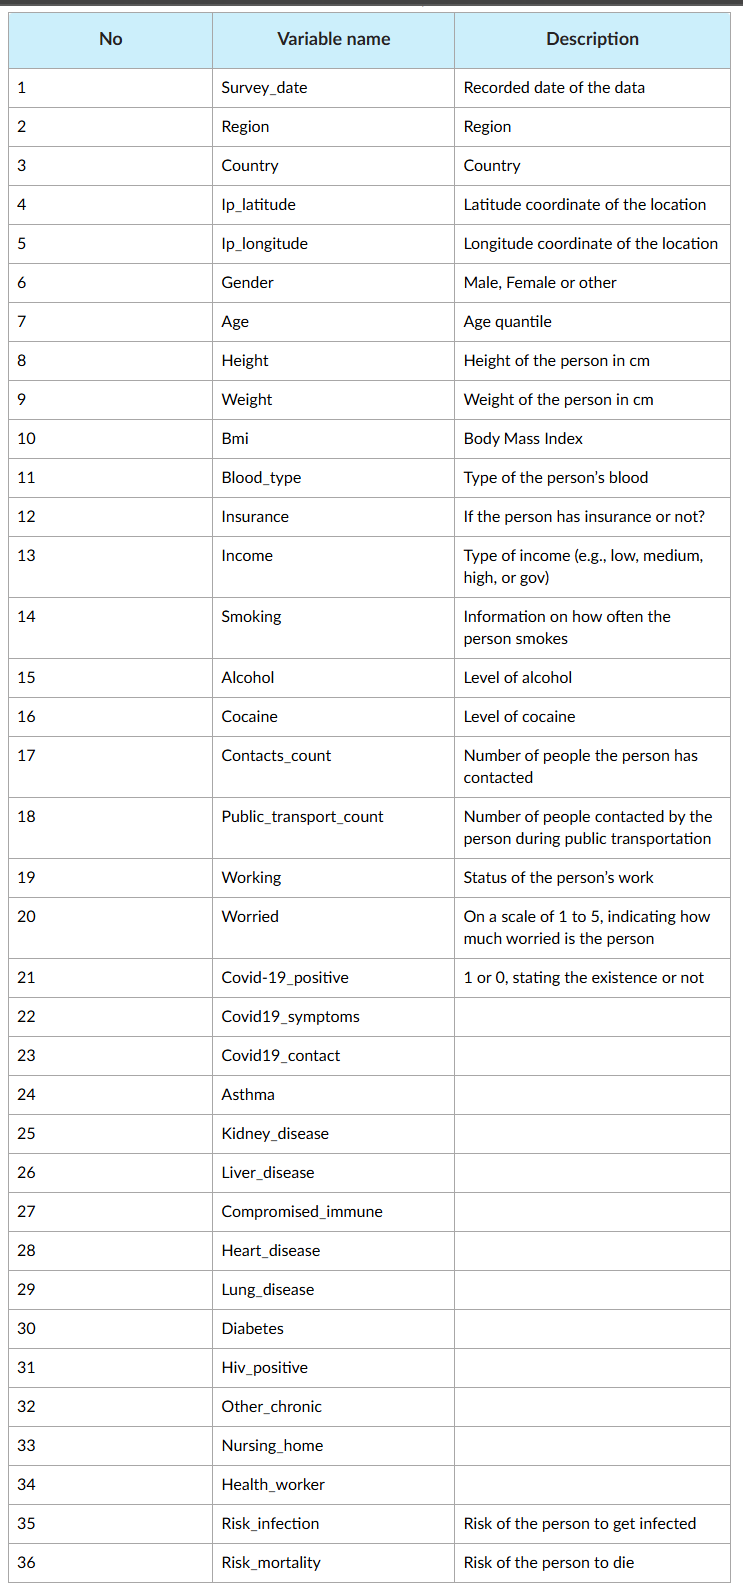

### Task 1: Examine the data types assigned by the "pandas" module

From dataset description, we have found some incorrect data types that have to update to correct format or type.

 

In [7]:
print(data.nunique())

print(data.shape)

survey_date                120
region                       5
country                     94
ip_latitude               5697
ip_longitude              5733
gender                       3
age                          9
height                      49
weight                      68
bmi                        399
blood_type                   9
insurance                    3
income                       5
smoking                      8
alcohol                     16
cocaine                     21
contacts_count              22
public_transport_count      16
working                      5
worried                      5
covid19_positive             2
covid19_symptoms             2
covid19_contact              2
asthma                       2
kidney_disease               2
liver_disease                2
compromised_immune           2
heart_disease                2
lung_disease                 2
diabetes                     2
hiv_positive                 2
other_chronic                2
nursing_

According to computed findings, the dataset has 5789 rows and 36 columns.  There will be a number of blank fields.

#### 1. survey_date

This is currently being read as `object` type.

There are 5789 non-null `survey_date` values which matches the specified row count in the rubric. There are thus populated `survey_date` values for all rows in the dataset.

In [10]:
# looking at a subset of values in the `survey_date` column
print(data['survey_date'])

0       2020-09-06 00:00:00
1                17/06/2020
2                20/06/2020
3                20/06/2020
4                22/06/2020
               ...         
5784             28/04/2020
5785    2020-02-12 00:00:00
5786    2020-02-12 00:00:00
5787    2020-02-12 00:00:00
5788             25/03/2020
Name: survey_date, Length: 5789, dtype: object


We can see here that we have two date formats:

- `YYYY-MM-DD` time format
- `DD-MM-YYYY` format, with no timestamp
  
We should standardise this to date only, so that all records have the same amount of date data. In terms of the rest of the information in the dataset, the time that the survey data was recorded is irrelevant.

We can also ensure this is set as `datetime` dtype with pandas.

In [12]:
# displaying effects of new column format

data_survey_date_as_datetime = data['survey_date'].astype('datetime64[ns]')

data_survey_date_as_datetime

0      2020-09-06
1      2020-06-17
2      2020-06-20
3      2020-06-20
4      2020-06-22
          ...    
5784   2020-04-28
5785   2020-02-12
5786   2020-02-12
5787   2020-02-12
5788   2020-03-25
Name: survey_date, Length: 5789, dtype: datetime64[ns]

In [13]:
## to set the new data type for `survey_date`
data['survey_date'] = data['survey_date'].astype('datetime64[ns]')

In [14]:
# check the datatype of 'survey_date'
print(data['survey_date'].dtype)

datetime64[ns]


-----------

#### 2. region

This is currently being read as `object` type.

pandas recognises 1562 non-null `region` values (4227 `region` values are being read as null).

In [17]:
## looking at values in the `region` column

print(data['region'])

data['region'].value_counts()

0        AF
1        AF
2        AF
3        AF
4        AF
       ... 
5784     SA
5785     SA
5786     SA
5787     SA
5788    NaN
Name: region, Length: 5789, dtype: object


region
EU    801
SA    399
AS    206
AF     79
OC     77
Name: count, dtype: int64

We are still missing all `region` values set to `NA` (meaning `North America` in the context of this dataset).

This is because the default setting for `pandas` reads in `NA` as representing `NaN`.

We will need to ensure this is parsed properly by setting `keep_default_na` to `False` when reading in the Excel file, and specifying `""` as representative of missing values.

In [19]:
## reading in the Excel file again

data = pd.read_excel('nexoid.xlsx', keep_default_na=False, na_values=[""])

## setting `survey_date` again

data['survey_date'] = data['survey_date'].astype('datetime64[ns]')

## setting `region` dtype again

data_region_as_str = data['region'].astype('category')

data_region_as_str

0        AF
1        AF
2        AF
3        AF
4        AF
       ... 
5784     SA
5785     SA
5786     SA
5787     SA
5788    NaN
Name: region, Length: 5789, dtype: category
Categories (6, object): ['AF', 'AS', 'EU', 'NA', 'OC', 'SA']

Note that non-null values for region have now increased to 5787 as a result of representing the newly-included `NA` category.

In [21]:
## setting the new data type for `region`
data['region'] = data['region'].astype('category')

data['region'].value_counts()

region
NA    4225
EU     801
SA     399
AS     206
AF      79
OC      77
Name: count, dtype: int64

In [22]:
## check the datatype of 'region' 
print(data['region'].dtype)

category


--------------

#### 3. country
This is currently being read as object type.

pandas recognises 5787 non-null country values (2 country values are being read as null, which matches the Excel spreadsheet).

In [25]:
## looking at values in the `country` column
print(data['country'])

data['country'].value_counts()

0        ZA
1        ZA
2        ZA
3        ZA
4        ZA
       ... 
5784     BR
5785     BR
5786     BR
5787     BR
5788    NaN
Name: country, Length: 5789, dtype: object


country
US    3885
GB     365
BR     270
CA     208
MX      94
      ... 
DZ       1
NA       1
AD       1
KY       1
UA       1
Name: count, Length: 95, dtype: int64

In [26]:
# displaying effects of new column format
data_country_as_str = data['country'].astype('category')

data_country_as_str

0        ZA
1        ZA
2        ZA
3        ZA
4        ZA
       ... 
5784     BR
5785     BR
5786     BR
5787     BR
5788    NaN
Name: country, Length: 5789, dtype: category
Categories (95, object): ['AD', 'AE', 'AM', 'AR', ..., 'UA', 'US', 'VI', 'ZA']

In [27]:
## setting the new data type for `country`
data['country'] = data['country'].astype('category')

In [28]:
## check the datatype of 'country' 
print(data['country'].dtype)

category


------------------------

#### 4. ip_latitude 
#### 5. ip_longitude
These are currently being read as float64 type.

There are 5789 non-null ip_latitude values and 5789 non-null ip_longitude values which matches the specified row count in the rubric. There are thus populated ip_latitude values and ip_longitude values for all rows in the dataset.

In [31]:
# looking at values in the `ip_latitude` column
print(data['ip_latitude'])

0      -33.9052
1      -26.1891
2      -27.9752
3      -26.3227
4      -29.8587
         ...   
5784   -22.2103
5785   -19.8898
5786   -19.8543
5787   -22.9562
5788    51.5875
Name: ip_latitude, Length: 5789, dtype: float64


In [32]:
# looking at values in the `ip_longitude` column

print(data['ip_longitude'])

0       18.3821
1       28.0225
2       27.1068
3       28.1050
4       31.0653
         ...   
5784   -49.1535
5785   -43.9973
5786   -44.0026
5787   -43.3809
5788    -0.1807
Name: ip_longitude, Length: 5789, dtype: float64


This seems reasonable for latitude and longitude expressed in degrees decimal. Spot-checking the provided longitude and latitude per row to see if it matches the specified region and country value proved successful. `ip_longitude` and `ip_latitude` might be useful for extrapolating the two rows with missing data for `region` and `country`.

In [34]:
## checking the datatype of 'ip_latitude' and 'ip_longitude' 
print(data['ip_latitude'].dtype)
print(data['ip_longitude'].dtype)

float64
float64


------------

#### 6. gender
These are currently being read as` objec`t type.

There are 5789 non-nu`ll gen`der values which matches the specified row count in the rubric. There are thus populat`ed gender values for all rows in the dataset.

In [37]:
## looking at values in the `gender` column
print(data['gender'])

data['gender'].value_counts()

0         male
1       female
2       female
3         male
4       female
         ...  
5784      male
5785    female
5786    female
5787      male
5788      male
Name: gender, Length: 5789, dtype: object


gender
male      2985
female    2790
other       14
Name: count, dtype: int64

In [38]:
# displaying effects of new column format
data_gender_as_str = data['gender'].astype('category')

data_gender_as_str

0         male
1       female
2       female
3         male
4       female
         ...  
5784      male
5785    female
5786    female
5787      male
5788      male
Name: gender, Length: 5789, dtype: category
Categories (3, object): ['female', 'male', 'other']

In [39]:
## setting the new data type for `gender`
data['gender'] = data['gender'].astype('category')

In [40]:
## check the datatype of 'gender' 
print(data['gender'].dtype)

category


------------------------------

#### 7. age
This is currently being read as object type.

There are 5789 non-null age values which matches the specified row count in the rubric. There are thus populated age values for all rows in the dataset.

In [43]:
## looking at values in the `age` column
print(data['age'])

data['age'].value_counts()

0       20_30
1       70_80
2       40_50
3       40_50
4       30_40
        ...  
5784    40_50
5785    20_30
5786    20_30
5787    40_50
5788    50_60
Name: age, Length: 5789, dtype: object


age
30_40      1412
40_50      1111
20_30       996
50_60       926
60_70       765
70_80       354
10_20       205
0_10         14
100_110       6
Name: count, dtype: int64

In [44]:
# displaying effects of new column format
data_age_as_str = data['age'].astype('category')

data_age_as_str

0       20_30
1       70_80
2       40_50
3       40_50
4       30_40
        ...  
5784    40_50
5785    20_30
5786    20_30
5787    40_50
5788    50_60
Name: age, Length: 5789, dtype: category
Categories (9, object): ['0_10', '100_110', '10_20', '20_30', ..., '40_50', '50_60', '60_70', '70_80']

In [45]:
## setting the new data type for `age`
data['age'] = data['age'].astype('category')

In [46]:
## check the datatype of 'age' 
print(data['age'].dtype)

category


--------------------

#### 8. height
This is currently being read as int64 type.

There are 5789 non-null height values which matches the specified row count in the rubric. There are thus populated height values for all rows in the dataset.

In [49]:
## looking at values in the `height` column
print(data['height'])

data['height'].value_counts()

0       188
1       164
2       164
3       170
4       164
       ... 
5784    184
5785    168
5786    160
5787    190
5788    172
Name: height, Length: 5789, dtype: int64


height
168    421
178    413
172    410
164    405
174    405
170    366
176    357
166    351
184    323
182    304
162    297
180    274
158    206
186    205
160    202
188    170
156    142
154    137
190     94
192     69
194     49
152     41
150     27
196     21
198     15
148     14
136     13
134      5
200      5
146      5
138      5
144      5
126      4
112      3
204      3
122      3
128      2
114      2
202      2
118      2
110      2
210      2
124      2
130      1
120      1
216      1
116      1
238      1
228      1
Name: count, dtype: int64

In [50]:
## check the datatype of 'height' 
print(data['height'].dtype)

int64


This makes sense as an int64 type, as it was originally.

----

#### 9. weight
This is currently being read as int64 type.

There are 5789 non-null weight values which matches the specified row count in the rubric. There are thus populated weight values for all rows in the dataset.

In [54]:
## looking at values in the `weight` column
print(data['weight'])

data['weight'].value_counts()

0       104
1        62
2        78
3        60
4        64
       ... 
5784     94
5785     60
5786     54
5787    138
5788     96
Name: weight, Length: 5789, dtype: int64


weight
74     271
82     267
70     253
80     240
84     235
      ... 
164      4
174      3
166      3
154      2
170      2
Name: count, Length: 68, dtype: int64

In [55]:
## check the datatype of 'weight' 
print(data['weight'].dtype)

int64


Assuming the description for weight means kg instead of cm, this also seems fine to remain as int64 type.

------------

#### 10. bmi

This is currently being read as `float64` type.

There are 5789 non-null `bmi` values which matches the specified row count in the rubric. There are thus populated `bmi` values for all rows in the dataset.

In [59]:
## looking at values in the `bmi` column
print(data['bmi'])

data['bmi'].value_counts()

0       29.4
1       23.0
2       29.0
3       20.7
4       23.7
        ... 
5784    27.7
5785    21.2
5786    21.0
5787    38.2
5788    32.4
Name: bmi, Length: 5789, dtype: float64


bmi
27.7    136
29.0    126
27.1    120
28.3    107
29.7     99
       ... 
64.8      1
56.2      1
45.8      1
50.3      1
50.1      1
Name: count, Length: 399, dtype: int64

In [60]:
## check the datatype of 'bmi' 
print(data['bmi'].dtype)

float64



This makes sense to remain as a float, although some spot-checks may be useful to see if the height and weight values are indicative of the documented `bmi` value.

----------------------

#### 11. blood_type

This is currently being read as `object` type.

pandas recognises 5689 non-null `blood_type` values (100 `blood_type` values are being read as null).

In [64]:
## looking at values in the `blood_type` column
print(data['blood_type'])

data['blood_type'].value_counts()

0            op
1            bp
2       unknown
3            bp
4            op
         ...   
5784         ap
5785         ap
5786         op
5787         op
5788         on
Name: blood_type, Length: 5789, dtype: object


blood_type
unknown    1784
ap         1279
op         1251
on          417
bp          394
an          244
abp         191
bn           91
abn          38
Name: count, dtype: int64

This field represents the respondent's blood type. Possible values are as follows:

- `ap` for A+
- `an` for A-
- `bp` for B+
- `bn` for B-
- `abp` for AB+
- `abn` for AB-
- `op` for O+
- `on` for O-
- `unknown`

This makes sense as a `category` type.

In [66]:
## setting the new data type for `blood_type`
data['blood_type'] = data['blood_type'].astype('category')

In [67]:
## check the datatype of 'blood_type' 
print(data['blood_type'].dtype)

category


----------------------

#### 12. insurance

This is currently being read as `object` type.

pandas recognises 4497 `non-null` insurance values (1292 `insurance` values are being read as null).

In [70]:
## looking at values in the `insurance` column
print(data['insurance'])

data['insurance'].value_counts()

0       yes
1       yes
2       yes
3       yes
4       yes
       ... 
5784    NaN
5785    NaN
5786    NaN
5787    NaN
5788    NaN
Name: insurance, Length: 5789, dtype: object


insurance
yes      3544
no        622
blank     331
Name: count, dtype: int64

There are three possible values; `yes`, `no` and `blank`.

This seems like another `category` type.

In [72]:
## setting the new data type for `insurance`
data['insurance'] = data['insurance'].astype('category')

In [73]:
## check the datatype of 'blood_type' 
print(data['insurance'].dtype)

category


--------

#### 13. income

This is currently being read as `object` type.

pandas recognises 4636 non-null `income` values (1153 `income` values are being read as null).

In [76]:
## looking at values in the `income` column
print(data['income'])

data['income'].value_counts()

0       med
1       med
2       med
3       med
4       med
       ... 
5784    NaN
5785    NaN
5786    NaN
5787    NaN
5788    NaN
Name: income, Length: 5789, dtype: object


income
med      2142
high     1886
low       398
blank     122
gov        88
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field represents the income level of the respondent. 

Possible values are: 
- `high`
- `med`
- `low`
- `gov` for respondent on social welfare/government support
- `blank`

This is a `category` field.

In [78]:
## setting the new data type for `income`
data['income'] = data['income'].astype('category')

In [79]:
## check the datatype of 'income' 
print(data['income'].dtype)

category


----------------------------

#### 14. smoking

This is currently being read as `object` type.

pandas recognises 5753 non-null `smoking` values (36 `smoking` values are being read as null).

In [82]:
## looking at values in the `smoking` column
print(data['smoking'])

data['smoking'].value_counts()

0           never
1           never
2           never
3       yesmedium
4           never
          ...    
5784       quit10
5785        never
5786        never
5787        never
5788          NaN
Name: smoking, Length: 5789, dtype: object


smoking
never        3713
quit5         485
quit10        473
quit0         319
vape          247
yesmedium     230
yeslight      206
yesheavy       80
Name: count, dtype: int64

Possible values are as follows:

- `never` if the respondent never smoked or vaped
- `vape` if the respondent is vaping or using e-cigarettes
- `yeslight` if the respondent is a light smoker (1-5 per day)
- `yesmedium` if the respondent is a medium smoker (6-20 per day)
- `yesheavy` if the respondent is a heavy smoker (>20 per day)
- `quit0` if the respondent has recently quit smoking
- `quit5` if the respondent quit smoking >5 years ago
- `quit10` if the respondent quit smoking quit >10 years ago

In [84]:
## setting the new data type for `smoking`
data['smoking'] = data['smoking'].astype('category')

In [85]:
## check the datatype of 'smoking' 
print(data['smoking'].dtype)

category


--------

#### 15. alcohol

These are currently being read as `float64` type.

There are 5751 non-null `alcohol` values that do not match the specified row count in the rubric (5789).
Therefore, 38 `alcohol` values are being read as null.

In [88]:
## looking at values in the `alcohol` column
print(data['alcohol'])

data['alcohol'].value_counts()

0       0.0
1       0.0
2       2.0
3      -1.0
4      -1.0
       ... 
5784    3.0
5785    NaN
5786    NaN
5787    NaN
5788   -1.0
Name: alcohol, Length: 5789, dtype: float64


alcohol
-1.0     1920
 0.0     1275
 1.0      612
 2.0      466
 3.0      310
 4.0      247
 5.0      194
 7.0      166
 14.0     117
 10.0     108
 6.0       86
 13.0      72
 12.0      64
 8.0       48
 9.0       39
 11.0      27
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field represents the number of days the respondent has consumed alcohol over the past 14 days. Values range from `0` to `14`. `-1` represents respondents who have never drunk alcohol.

This field should be represented as an `int64` type.

In [90]:
# Convert 'alcohol' column to nullable integer (Int64) type
data['alcohol'] = data['alcohol'].astype('Int64')

In [91]:
## check the datatype of 'alcohol' 
print(data['alcohol'].dtype)

Int64


----------------

#### 16. cocaine

These are currently being read as `float64` type.

There are non-null `cocaine` values (1430) that do not match the specified row count in the rubric (5789).
Therefore, 4359 `cocaine` values are being read as null.

In [94]:
## looking at values in the `cocaine` column
print(data['cocaine'])

data['cocaine'].value_counts()

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5784   -1.0
5785    NaN
5786    NaN
5787    NaN
5788    NaN
Name: cocaine, Length: 5789, dtype: float64


cocaine
-1.0     1078
 0.0      228
 1.0       33
 2.0       17
 5.0       14
 4.0       12
 3.0       12
 7.0        7
 9.0        5
 28.0       4
 27.0       3
 10.0       3
 20.0       3
 6.0        2
 16.0       2
 23.0       2
 21.0       1
 22.0       1
 14.0       1
 15.0       1
 25.0       1
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field represents the number of days the respondent has consumed cocaine over the past 28 days. Values range from `0` to `28`. `-1` represents respondents who have never consumed cocaine.

This field should be converted from a `float64` to an `int64` type..

In [96]:
# Convert 'cocaine' column to nullable integer (Int64) type
data['cocaine'] = data['cocaine'].astype('Int64')

In [97]:
## check the datatype of 'cocaine' 
print(data['cocaine'].dtype)

Int64


-----------

#### 17. contacts_count

These are currently being read as `float64` type.

There are non-null `contacts_count` values (5747) that do not match the specified row count in the rubric (5789).

Therefore, 42 `contacts_count` values are being read as null.

In [100]:
## looking at values in the `contacts_count` column
print(data['contacts_count'])

data['contacts_count'].value_counts()

0        9.0
1        2.0
2        5.0
3        6.0
4        2.0
        ... 
5784     3.0
5785    20.0
5786    20.0
5787    10.0
5788     NaN
Name: contacts_count, Length: 5789, dtype: float64


contacts_count
21.0    626
1.0     608
5.0     577
10.0    560
3.0     543
4.0     538
2.0     476
6.0     370
20.0    265
8.0     257
0.0     213
7.0     190
15.0    171
12.0     99
9.0      76
14.0     34
19.0     34
11.0     33
16.0     29
13.0     26
18.0     14
17.0      8
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field represents the number of people the respondent was in close contact with over the past week. Values range from `0` to `20`, with `21` being reserved for respondents reporting more than 20 contacts.

This field should be converted from a `float64` to an `int64` type.

In [102]:
# Convert 'contacts_count' column to nullable integer (Int64) type
data['contacts_count'] = data['contacts_count'].astype('Int64')

In [103]:
## check the datatype of 'contacts_count' 
print(data['contacts_count'].dtype)

Int64


----------------------------

#### 18. public_transport_count

These are currently being read as `float64` type.

There are non-null `public_transport_count` values (4572) that do not match the specified row count in the rubric (5789). 

Therefore, 1217 `public_transport_count` values are being read as null.

In [106]:
## looking at values in the `contacts_count` column
print(data['public_transport_count'])

data['public_transport_count'].value_counts()

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5784    NaN
5785    NaN
5786    NaN
5787    NaN
5788    NaN
Name: public_transport_count, Length: 5789, dtype: float64


public_transport_count
0.0     4162
1.0      101
2.0       89
4.0       46
5.0       28
6.0       26
3.0       26
10.0      23
8.0       18
14.0      17
15.0      16
13.0       5
12.0       5
7.0        5
11.0       3
9.0        2
Name: count, dtype: int64

This should be converted to `int64` type.

In [108]:
# Convert 'cocaine' column to nullable integer (Int64) type
data['public_transport_count'] = data['public_transport_count'].astype('Int64')

In [109]:
## check the datatype of 'public_transport_count' 
print(data['public_transport_count'].dtype)

Int64


-------------

#### 19. working

This is currently being read as `object` type.

pandas recognises 5747 non-null `working` values (42 `working` values are being read as null).

In [112]:
## looking at values in the `working` column

print(data['working'])

data['working'].value_counts()

0       travel non critical
1                     never
2                   stopped
3           travel critical
4           travel critical
               ...         
5784        travel critical
5785        travel critical
5786        travel critical
5787    travel non critical
5788                    NaN
Name: working, Length: 5789, dtype: object


working
stopped                1732
never                  1577
travel critical        1312
travel non critical     620
home                    506
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field represents the working status of respondents.
Possible values for this column are:

- `stopped`
- `never`
- `travel_critical`
- `travel_non_critical`
- `home`

In [114]:
## setting the new data type for `working`
data['working'] = data['working'].astype('category')

In [115]:
## check the datatype of 'working' 
print(data['working'].dtype)

category


-----------

#### 20. worried

This is currently being read as `float64` type. 

There are non-null `worried` values (4518) that do not match the specified row count in the rubric (5789). 
Therefore, 1271 `worried` values are being read as null.

In [118]:
## looking at values in the `worried` column

print(data['worried'])

data['worried'].value_counts()

0       3.0
1       3.0
2       3.0
3       3.0
4       4.0
       ... 
5784    NaN
5785    4.0
5786    3.0
5787    3.0
5788    NaN
Name: worried, Length: 5789, dtype: float64


worried
4.0    2079
3.0    1674
5.0     377
2.0     342
1.0      46
Name: count, dtype: int64

In [119]:
# set as category type

data['worried'] = data['worried'].astype('category')

In [120]:
## check the datatype of 'worried' 
print(data['worried'].dtype)

category


---------

#### 21. covid19_positive

These are currently being read as `int64` type.

There are 5789 non-null `covid19_positive` values which matches the specified row count in the rubric. There are thus populated `covid19_positive` values for all rows in the dataset.

In [123]:
## looking at values in the `covid19_positive` column

print(data['covid19_positive'])

data['covid19_positive'].value_counts()

0       1
1       1
2       1
3       1
4       1
       ..
5784    1
5785    0
5786    0
5787    1
5788    1
Name: covid19_positive, Length: 5789, dtype: int64


covid19_positive
0    3454
1    2335
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field has `0` if the respondent is covid-19 negative, and `1` if the respondent is covid-19 positive. This is fine to remain as an `int64` type.

In [125]:
## check the datatype of 'covid19_positive' 
print(data['covid19_positive'].dtype)

int64


----------------

####  22. covid19_symptoms

These are currently being read as `int64` type.

There are 5789 non-null `covid19_symptoms` values which matches the specified row count in the rubric. There are thus populated `covid19_symptoms` values for all rows in the dataset.

In [128]:
## looking at values in the `covid19_symptoms` column

print(data['covid19_symptoms'])

data['covid19_symptoms'].value_counts()

0       0
1       0
2       0
3       0
4       0
       ..
5784    0
5785    0
5786    0
5787    1
5788    0
Name: covid19_symptoms, Length: 5789, dtype: int64


covid19_symptoms
0    4792
1     997
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field has `0` if the respondent does not have symptoms of covid-19, and `1` if the respondent has covid-19 symptoms. This is fine to remain as an `int64` type.

In [130]:
## check the datatype of 'covid19_symptoms' 
print(data['covid19_symptoms'].dtype)

int64


-----------

#### 23. covid19_contact

These are currently being read as `int64` type. 
There are 5789 non-null `covid19_contact` values which matches the specified row count in the rubric. There are thus populated `covid19_contact` values for all rows in the dataset.

In [133]:
## looking at values in the `covid19_contact` column

print(data['covid19_contact'])

data['covid19_contact'].value_counts()

0       0
1       0
2       0
3       1
4       0
       ..
5784    0
5785    1
5786    1
5787    1
5788    0
Name: covid19_contact, Length: 5789, dtype: int64


covid19_contact
0    4800
1     989
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field has `0` if the respondent does not have a covid-19 positive contact, and `1` if the respondent has a covid-19 positive contact.

This is fine to remain as an `int64` type.

In [135]:
## check the datatype of 'covid19_contact' 
print(data['covid19_contact'].dtype)

int64


--------

#### 24. asthma

These are currently being read as `int64` type. 
There are 5789 non-null `asthma` values which matches the specified row count in the rubric. There are thus populated `asthma` values for all rows in the dataset.

In [138]:
## looking at values in the `asthma` column

print(data['asthma'])

data['asthma'].value_counts()

0       0
1       0
2       0
3       0
4       0
       ..
5784    0
5785    0
5786    0
5787    0
5788    0
Name: asthma, Length: 5789, dtype: int64


asthma
0    5032
1     757
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field has 0 if the respondent does not have asthma, and 1 if the respondent has asthma.

This is fine to remain as an `int64` type.

In [140]:
## check the datatype of 'asthma' 
print(data['asthma'].dtype)

int64


-------

#### 25. kidney_disease

These are currently being read as `int64` type. 
There are 5789 non-null `kidney_disease` values which matches the specified row count in the rubric. There are thus populated `kidney_disease` values for all rows in the dataset.

In [143]:
## looking at values in the `kidney_disease` column

print(data['kidney_disease'])

data['kidney_disease'].value_counts()

0       0
1       0
2       0
3       0
4       0
       ..
5784    1
5785    0
5786    0
5787    0
5788    0
Name: kidney_disease, Length: 5789, dtype: int64


kidney_disease
0    5726
1      63
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field has 0 if the respondent does not have kidney disease, and 1 if the respondent has kidney disease.

This is fine to remain as an `int64` type.

In [145]:
## check the datatype of 'kidney_disease' 
print(data['kidney_disease'].dtype)

int64


---------

#### 26. liver_disease

These are currently being read as `int64` type. 
There are 5789 non-null `liver_disease` values which matches the specified row count in the rubric. There are thus populated `liver_disease` values for all rows in the dataset.

In [148]:
## looking at values in the `liver_disease` column

print(data['liver_disease'])

data['liver_disease'].value_counts()

0       0
1       0
2       0
3       0
4       0
       ..
5784    0
5785    0
5786    0
5787    0
5788    0
Name: liver_disease, Length: 5789, dtype: int64


liver_disease
0    5745
1      44
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field has 0 if the respondent does not have liver disease, and 1 if the respondent has liver disease.

This is fine to remain as an `int64` type.

In [150]:
## check the datatype of 'liver_disease' 
print(data['liver_disease'].dtype)

int64


-------------------

#### 27. compromised_immune

This field is currently being read as `int64` type.

There are 5789 non-null `compromised_immune` values which matches the specified row count in the rubric. There are thus populated `compromised_immune` values for all rows in the dataset.

In [153]:
## looking at values in the `compromised_immune` column

print(data['compromised_immune'])

data['compromised_immune'].value_counts()

0       0
1       0
2       0
3       0
4       0
       ..
5784    0
5785    0
5786    0
5787    0
5788    0
Name: compromised_immune, Length: 5789, dtype: int64


compromised_immune
0    5444
1     345
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field has 0 if the respondent does not have compromised immunity and 1 if the respondent has compromised immunity.

This is fine to remain as an `int64` type.

In [155]:
## check the datatype of 'compromised_immune' 
print(data['compromised_immune'].dtype)

int64


-----------------

#### 28. heart_disease

These are currently being read as `int64` type. 

There are 5789 non-null `heart_disease` values which matches the specified row count in the rubric. There are thus populated `heart_disease` values for all rows in the dataset.

In [158]:
## looking at values in the `heart_disease` column

print(data['heart_disease'])

data['heart_disease'].value_counts()

0       0
1       0
2       0
3       0
4       0
       ..
5784    0
5785    0
5786    0
5787    0
5788    1
Name: heart_disease, Length: 5789, dtype: int64


heart_disease
0    5607
1     182
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field has 0 if the respondent does not have heart disease and 1 if the respondent has heart disease.

This is fine to remain as an `int64` type.

In [160]:
## check the datatype of 'heart_disease' 
print(data['heart_disease'].dtype)

int64


--------------------

#### 29. lung_disease

These are currently being read as `int64` type.

There are 5789 non-null `lung_disease` values which matches the specified row count in the rubric. There are thus populated `lung_disease` values for all rows in the dataset.

In [163]:
## looking at values in the `lung_disease` column

print(data['lung_disease'])

data['lung_disease'].value_counts()

0       0
1       0
2       0
3       0
4       0
       ..
5784    0
5785    0
5786    0
5787    0
5788    0
Name: lung_disease, Length: 5789, dtype: int64


lung_disease
0    5654
1     135
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field has 0 if the respondent does not have lung disease and 1 if the respondent has lung disease.

This is fine to remain as an `int64` type.

In [165]:
## check the datatype of 'lung_disease' 
print(data['lung_disease'].dtype)

int64


----------------

#### 30. diabetes

These are currently being read as `int64` type. 
There are 5789 non-null `diabetes` values which matches the specified row count in the rubric. There are thus populated `diabetes` values for all rows in the dataset.

In [168]:
## looking at values in the `diabetes` column

print(data['diabetes'])

data['diabetes'].value_counts()

0       0
1       0
2       1
3       0
4       0
       ..
5784    0
5785    0
5786    0
5787    0
5788    1
Name: diabetes, Length: 5789, dtype: int64


diabetes
0    5320
1     469
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field has 0 if the respondent does not have diabetes and 1 if the respondent has diabetes.

This is fine to remain as an `int64` type.

In [170]:
## check the datatype of 'diabetes' 
print(data['diabetes'].dtype)

int64


---------------------

#### 31. hiv_positive

These are currently being read as `int64` type. There are 5789 non-null `hiv_positive` values which matches the specified row count in the rubric. There are thus populated `hiv_positive values` for all rows in the dataset.

In [173]:
## looking at values in the `hiv_positive` column

print(data['hiv_positive'])

data['hiv_positive'].value_counts()

0       0
1       0
2       0
3       0
4       0
       ..
5784    0
5785    0
5786    0
5787    0
5788    0
Name: hiv_positive, Length: 5789, dtype: int64


hiv_positive
0    5766
1      23
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field has 0 if the respondent is not HIV-positive and 1 if the respondent is HIV-positive.

This is fine to remain as an `int64` type.

In [175]:
## check the datatype of 'hiv_positive' 
print(data['hiv_positive'].dtype)

int64


---------------

#### 32. other_chronic

These are currently being read as `int64` type.

There are 5789 non-null `other_chronic` values which matches the specified row count in the rubric. There are thus populated `other_chronic` values for all rows in the dataset.


In [178]:
## looking at values in the `other_chronic` column

print(data['other_chronic'])

data['other_chronic'].value_counts()

0       0
1       0
2       0
3       0
4       0
       ..
5784    0
5785    0
5786    0
5787    1
5788    0
Name: other_chronic, Length: 5789, dtype: int64


other_chronic
0    5411
1     378
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field has 1 if the respondent has another chronic condition not mentioned previously, and 0 if not.

This is fine to remain as an `int64` type.

In [180]:
## check the datatype of 'other_chronic' 
print(data['other_chronic'].dtype)

int64


--------

#### 33. nursing_home

These are currently being read as `int64` type. 
There are 5789 non-null `nursing_home` values which matches the specified row count in the rubric. There are thus populated `nursing_home` values for all rows in the dataset.

In [183]:
## looking at values in the `nursing_home` column

print(data['nursing_home'])

data['nursing_home'].value_counts()

0       0
1       0
2       0
3       0
4       0
       ..
5784    0
5785    0
5786    0
5787    0
5788    0
Name: nursing_home, Length: 5789, dtype: int64


nursing_home
0    5768
1      21
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field has 1 if the respondent resides in a nursing home, and 0 if not.

This is fine to remain as an `int64` type.

In [185]:
## check the datatype of 'nursing_home' 
print(data['nursing_home'].dtype)

int64


---------

#### 34. health_worker

These are currently being read as `int64` type. 
There are 5789 non-null `health_worker` values which matches the specified row count in the rubric. There are thus populated `health_worker` values for all rows in the dataset.

In [188]:
## looking at values in the `health_worker` column

print(data['health_worker'])

data['health_worker'].value_counts()

0       0
1       0
2       0
3       0
4       1
       ..
5784    0
5785    1
5786    1
5787    0
5788    0
Name: health_worker, Length: 5789, dtype: int64


health_worker
0    5299
1     490
Name: count, dtype: int64

Based on the Nexoid questionnaire website and associated resources, this field has `1` if the respondent is a health_worker, and `0` if not.

This is fine to remain as an `int64` type.

In [190]:
## check the datatype of 'health_worker' 
print(data['health_worker'].dtype)

int64


---------------

#### 35. risk_infection

These are currently being read as `int64` type. 
There are 5789 non-null `risk_infection` values which matches the specified row count in the rubric. There are thus populated `risk_infection` values for all rows in the dataset.

In [193]:
## looking at values in the `risk_infection` column
print(data['risk_infection'])

data['risk_infection'].value_counts()

0       100.0
1       100.0
2       100.0
3       100.0
4       100.0
        ...  
5784    100.0
5785     75.0
5786     75.0
5787    100.0
5788    100.0
Name: risk_infection, Length: 5789, dtype: float64


risk_infection
100.000    2335
5.000      1912
13.000      593
75.000      371
6.000       151
37.000      116
26.000       71
19.000       56
62.000       39
49.000       35
24.000       20
73.000       18
12.000       15
50.000       12
32.000        9
25.000        6
43.000        6
30.000        4
38.000        3
57.999        3
18.000        2
14.000        1
45.000        1
64.000        1
36.000        1
70.000        1
68.000        1
56.000        1
20.000        1
51.000        1
55.000        1
27.000        1
52.000        1
Name: count, dtype: int64

`risk_infection` appears to be expressed as a percentage.

Only 3 values out of 5789 are float values that cannot be expressed as integers without rounding.

We will round these three values from 57.999 to 58, and then set this field to have an `int64` data type.

In [195]:
# Rounding floats to ints

data['risk_infection'] = data['risk_infection'].round(0)

# setting `risk_infection` field to `int64` data type

data['risk_infection'] = data['risk_infection'].astype('int64')

In [196]:
## check the datatype of 'risk_infection' 
print(data['risk_infection'].dtype)

int64


--------------------

#### 36. risk_mortality

These are currently being read as `float64` type.

There are 5789 non-null `risk_mortality` values which matches the specified row count in the rubric. There are thus populated `risk_mortality` values for all rows in the dataset.

In [199]:
## looking at values in the `risk_mortality` column
print(data['risk_mortality'])

data['risk_mortality'].value_counts()

0       0.079
1       1.168
2       0.284
3       0.270
4       0.050
        ...  
5784    1.059
5785    0.050
5786    0.050
5787    0.276
5788    0.500
Name: risk_mortality, Length: 5789, dtype: float64


risk_mortality
0.050    1692
0.194     177
0.557     145
0.300     139
1.081     116
         ... 
1.076       1
1.445       1
1.749       1
0.309       1
0.500       1
Name: count, Length: 766, dtype: int64

Based on the Nexoid questionnaire website, `risk_mortality` seems to be expressed as a factor (i.e. if a respondent's `risk_mortality` is 1.749 based on the variables provided, their risk of mortality is 1.749 times the average person's risk of death).

As such, it makes sense for this to be retained as a float value.

In [201]:
## check the datatype of 'risk_mortality' 
print(data['risk_mortality'].dtype)

float64


---------------

#### Summary of updated data types

In [204]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   survey_date             5789 non-null   datetime64[ns]
 1   region                  5787 non-null   category      
 2   country                 5787 non-null   category      
 3   ip_latitude             5789 non-null   float64       
 4   ip_longitude            5789 non-null   float64       
 5   gender                  5789 non-null   category      
 6   age                     5789 non-null   category      
 7   height                  5789 non-null   int64         
 8   weight                  5789 non-null   int64         
 9   bmi                     5789 non-null   float64       
 10  blood_type              5689 non-null   category      
 11  insurance               4497 non-null   category      
 12  income                  4636 non-null   category

---------------

## TASK 2

### Identify and report on the skewness present in the variables

Skewness is typically applied to quantitative data.

**Quantitative values**:  
- `survey_date`
- `ip_longitude`  
- `ip_latitude`  
- `height`  
- `weight`  
- `bmi`  
- `alcohol`  
- `cocaine`  
- `contacts_count`  
- `public_transport_count`    
- `risk_infection`  
- `risk_mortality`

**Qualitative values**:  
- `region`  
- `country`  
- `sex`  
- `age`  
- `blood_type`  
- `insurance`  
- `income`  
- `smoking`  
- `worried`
- `covid19_positive`  
- `covid19_symptoms`  
- `covid19_contact`  
- `asthma`  
- `kidney_disease`  
- `liver_disease`  
- `compromised_immune`  
- `heart_disease`  
- `lung_disease`  
- `diabetes`  
- `hiv_positive`  
- `other_chronic`  
- `nursing_home`  
- `health_worker`

A key factor in this process is to use appropriate summary statistics meaures for qualitative vs. quantitative data types. For example, mean and median are used for quantitative variables, and we will determine skewness for these variables. For qualitative variables, we will be looking at the mode.

#### Numerical data summary

In [211]:
# `survey_date` is numerical data, being `datetime64[ns]` data type
# to make it easier to visualise here, we will convert it to days after the minimum day found in the data set
# this will also be useful for imputation via sklearn later on

data['survey_date_as_int'] = pd.to_datetime(data['survey_date'], errors='coerce')
min_date = data['survey_date_as_int'].min()  # Find the earliest date
data['survey_date_as_int'] = (data['survey_date_as_int'] - min_date).dt.days

# check
print("Minimum `survey_date` in dataset: ", min_date)

print("\nComparing `survey_date_as_int` column to `survey_date` column:\n", data[['survey_date_as_int', 'survey_date']])


Minimum `survey_date` in dataset:  2020-01-04 00:00:00

Comparing `survey_date_as_int` column to `survey_date` column:
       survey_date_as_int survey_date
0                    246  2020-09-06
1                    165  2020-06-17
2                    168  2020-06-20
3                    168  2020-06-20
4                    170  2020-06-22
...                  ...         ...
5784                 115  2020-04-28
5785                  39  2020-02-12
5786                  39  2020-02-12
5787                  39  2020-02-12
5788                  81  2020-03-25

[5789 rows x 2 columns]


In [212]:
# This code selects the columns with numeric data type 
# and stores the output in a new dataframe. 
numerical_data = data.select_dtypes(include=['float64', 'int64'])

In [213]:
# Calculate mean and median for each numerical column
mean_values = numerical_data.mean()
median_values = numerical_data.median()

In [214]:
# Display mean and median for comparison
print("Mean of numerical columns:\n", mean_values)
print("\nMedian of numerical columns:\n", median_values)

Mean of numerical columns:
 ip_latitude                33.054771
ip_longitude              -64.963734
height                    172.030057
weight                     84.773881
bmi                        28.570116
alcohol                     1.676926
cocaine                    -0.204895
contacts_count              7.828432
public_transport_count      0.415573
covid19_positive            0.403351
covid19_symptoms            0.172223
covid19_contact             0.170841
asthma                      0.130765
kidney_disease              0.010883
liver_disease               0.007601
compromised_immune          0.059596
heart_disease               0.031439
lung_disease                 0.02332
diabetes                    0.081016
hiv_positive                0.003973
other_chronic               0.065296
nursing_home                0.003628
health_worker               0.084643
risk_infection             50.977198
risk_mortality              0.562321
survey_date_as_int        145.358611
dtype: Flo

In [215]:
# Check skewness direction by comparing mean and median
skewness_direction = (mean_values - median_values).apply(lambda x: 'Positive Skew' if x > 0.05 else ('Negative Skew' if x < -0.05 else 'Symmetrical'))
print("\nSkewness Direction Based on Mean and Median:\n", skewness_direction)


Skewness Direction Based on Mean and Median:
 ip_latitude               Negative Skew
ip_longitude              Positive Skew
height                      Symmetrical
weight                    Positive Skew
bmi                       Positive Skew
alcohol                   Positive Skew
cocaine                   Positive Skew
contacts_count            Positive Skew
public_transport_count    Positive Skew
covid19_positive          Positive Skew
covid19_symptoms          Positive Skew
covid19_contact           Positive Skew
asthma                    Positive Skew
kidney_disease              Symmetrical
liver_disease               Symmetrical
compromised_immune        Positive Skew
heart_disease               Symmetrical
lung_disease                Symmetrical
diabetes                  Positive Skew
hiv_positive                Symmetrical
other_chronic             Positive Skew
nursing_home                Symmetrical
health_worker             Positive Skew
risk_infection            Positiv

#### Numerical data summary

In [217]:
# Extract categorical data
categorical_data = data.select_dtypes(include=['object', 'category'])

# Get the mode (most frequent value)
mode = categorical_data.mode().iloc[0]  # .iloc[0] will give the first mode if there are multiple modes
print(mode)

region             NA
country            US
gender           male
age             30_40
blood_type    unknown
insurance         yes
income            med
smoking         never
working       stopped
worried           4.0
Name: 0, dtype: object


#### `survey_date` visualisation

count    5789.000000
mean      145.358611
std        67.473230
min         0.000000
25%       102.000000
50%       155.000000
75%       185.000000
max       346.000000
Name: survey_date_as_int, dtype: float64


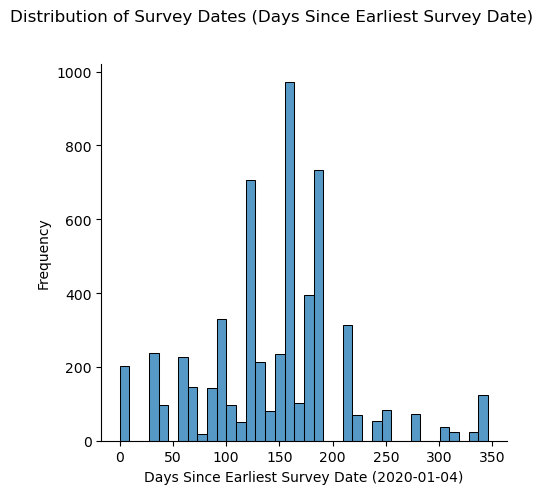

In [219]:
# taking the processed `survey_date_as_int` column:

print(data['survey_date_as_int'].describe())

# ----- displot -----

survey_date_plot = sns.displot(data['survey_date_as_int'])
survey_date_plot.set_axis_labels("Days Since Earliest Survey Date (2020-01-04)", "Frequency")
survey_date_plot.fig.suptitle("Distribution of Survey Dates (Days Since Earliest Survey Date)", fontsize=12)
survey_date_plot.fig.tight_layout(rect=[0, 0, 1, 0.96])

In [220]:
# Calculate skewness for `survey_date_as_int`
survey_date_as_int_skewness = skew(data['survey_date_as_int'])

# Display skewness values
print("Skewness of `survey_date_as_int`:")
print(survey_date_as_int_skewness)

Skewness of `survey_date_as_int`:
0.3359046216502826


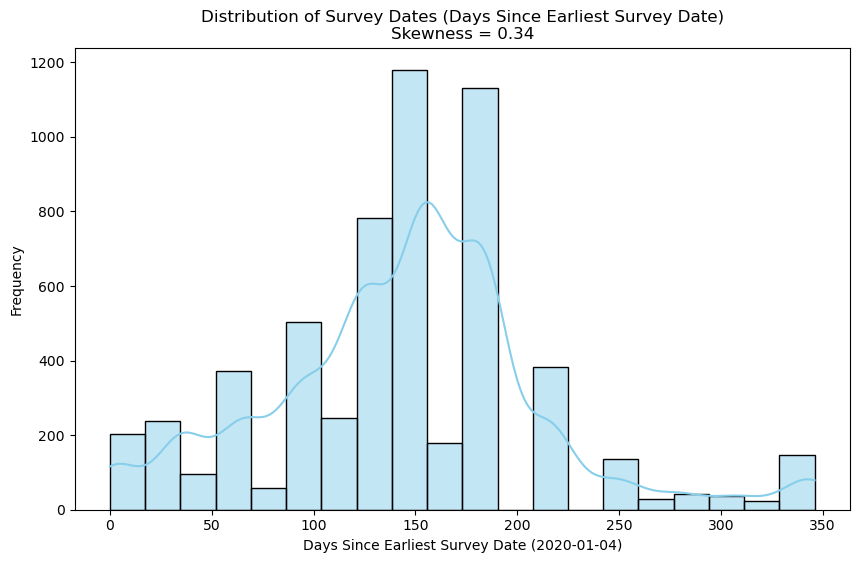

In [221]:
plt.figure(figsize=(10, 6))
sns.histplot(data['survey_date_as_int'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title(f'Distribution of Survey Dates (Days Since Earliest Survey Date)\nSkewness = {survey_date_as_int_skewness:.2f}')
plt.xlabel('Days Since Earliest Survey Date (2020-01-04)')
plt.ylabel('Frequency')

# Display the plot
plt.show()

The data is limited to 2020 only. Across these dates, we seem to have the most data midyear, around June 2020.

We can see that the data is mildly positively skewed. Skewness calculated via `sklearn`'s `skew` function is more accurate than a mean-median comparison, which earlier suggested negative skew.

#### `region` visualisation

In [224]:
print(data['region'].describe())

count     5787
unique       6
top         NA
freq      4225
Name: region, dtype: object


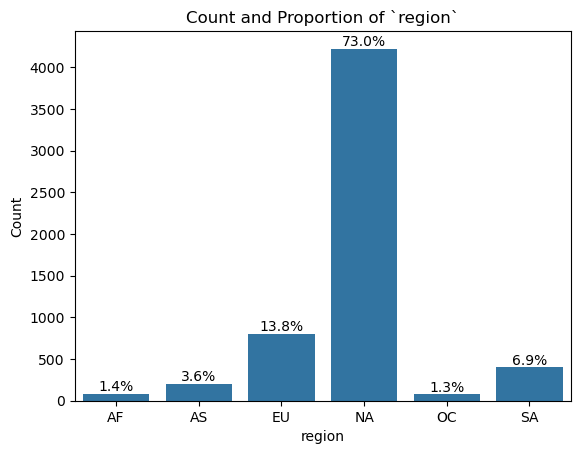

In [225]:
region_count = sns.countplot(data=data, x='region')

total = len(data)
for bar in region_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    region_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

region_count.set_ylabel('Count')
region_count.set_title('Count and Proportion of `region`')
plt.show()

The most frequent region is `NA`, representing North America, making up more than 70% of the data.

#### `country` visualisation

In [228]:
print(data['country'].describe())

count     5787
unique      95
top         US
freq      3885
Name: country, dtype: object


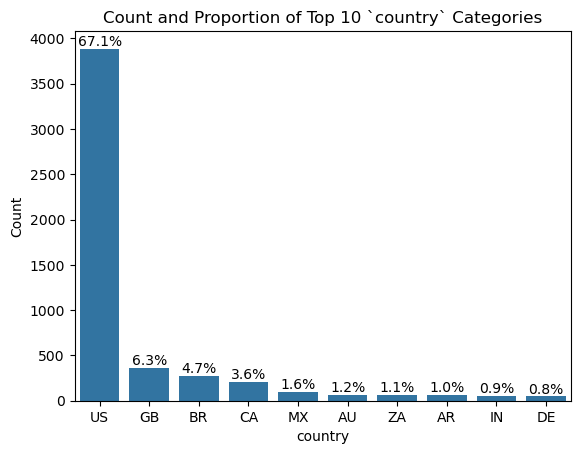

In [229]:
country_count = sns.countplot(data=data, x='country', order=data.country.value_counts().iloc[:10].index)

total = len(data)
for bar in country_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    country_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

country_count.set_ylabel('Count')
country_count.set_title('Count and Proportion of Top 10 `country` Categories')
plt.show()

Most respondents indicated they were in the United States of America (US).

The next most common countries respondents were from, in order:
- Great Britain (GB)
- Brazil (BR)
- Canada (CA)
- Mexico (MX)
- Australia (AU)
- South Africa (ZA)
- Argentina (AR)
- India (IN)
- Germany (DE)

#### `ip_longitude` & `ip_latitude` visualisation

In [232]:
# Calculate skewness for all numerical variables
ip_longitude_skewness = skew(data['ip_longitude'])
ip_latitude_skewness = skew(data['ip_latitude'])

# Display skewness values
print("Skewness of ip_longitude & ip_latitude variables:")
print(ip_longitude_skewness)
print(ip_latitude_skewness)

Skewness of ip_longitude & ip_latitude variables:
1.7366973419624463
-2.182608344482799


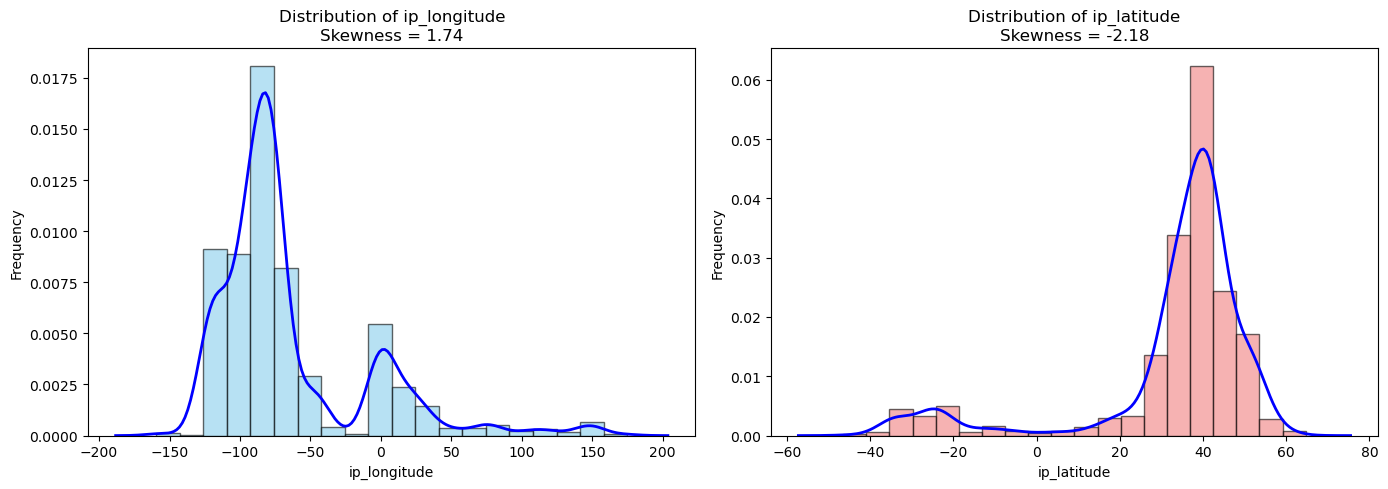

In [233]:
# Plot histograms for 'ip_longitude' and 'ip_latitude' to visualize skewness
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot for ip_longitude
axes[0].hist(data['ip_longitude'], bins=20, color='skyblue', edgecolor='black', density=True, alpha=0.6)
axes[0].set_title(f'Distribution of ip_longitude\nSkewness = {ip_longitude_skewness:.2f}')
axes[0].set_xlabel('ip_longitude')
axes[0].set_ylabel('Frequency')

# Plot for ip_latitude
axes[1].hist(data['ip_latitude'], bins=20, color='lightcoral', edgecolor='black', density=True, alpha=0.6)
axes[1].set_title(f'Distribution of ip_latitude\nSkewness = {ip_latitude_skewness:.2f}')
axes[1].set_xlabel('ip_latitude')
axes[1].set_ylabel('Frequency')

# Add KDE curve
sns.kdeplot(data['ip_longitude'], ax=axes[0], color='blue', linewidth=2)
sns.kdeplot(data['ip_latitude'], ax=axes[1], color='blue', linewidth=2)

# Display the plot
plt.tight_layout()
plt.show()

`ip_longitude` is positively skewed and `ip_latitude` is negatively skewed.

####  `gender` visualisation

In [236]:
print(data['gender'].describe())

count     5789
unique       3
top       male
freq      2985
Name: gender, dtype: object


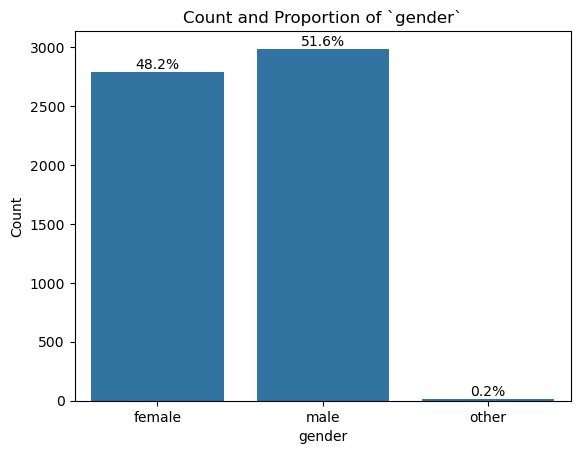

In [237]:
gender_count = sns.countplot(data=data, x='gender')

total = len(data)
for bar in gender_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    gender_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

gender_count.set_ylabel('Count')
gender_count.set_title('Count and Proportion of `gender`')
plt.show()

The most frequent value for `gender` is `male`.

The original dataset has `sex` for this field, and the website only seems to show a dropdown for either `male` or `female`, and no other options.

####  `age` visualisation

count      5789
unique        9
top       30_40
freq       1412
Name: age, dtype: object


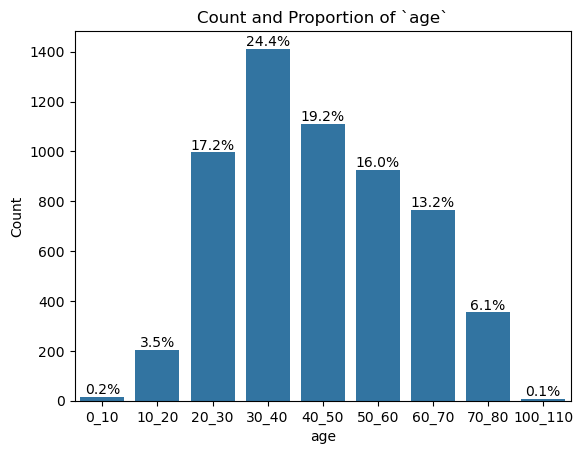

In [240]:
print(data['age'].describe())

# ----- countplot -----

order = ['0_10', '10_20', '20_30', '30_40', '40_50', '50_60', '60_70', '70_80', '100_110']

age_count = sns.countplot(data=data, x='age', order=order)

total = len(data)
for bar in age_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    age_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

age_count.set_ylabel('Count')
age_count.set_title('Count and Proportion of `age`')
plt.show()

Most respondents sit in the `30_40` category. Going off the ordered nature of this field, we could suggest a negative skew for `age` data.

####  `height` visualisation

In [243]:
# Calculate skewness for all numerical variables
height_skewness = skew(data['height'])

# Display skewness values
print("Skewness of height variable:")
print(height_skewness)

Skewness of height variable:
-0.39232207901523547


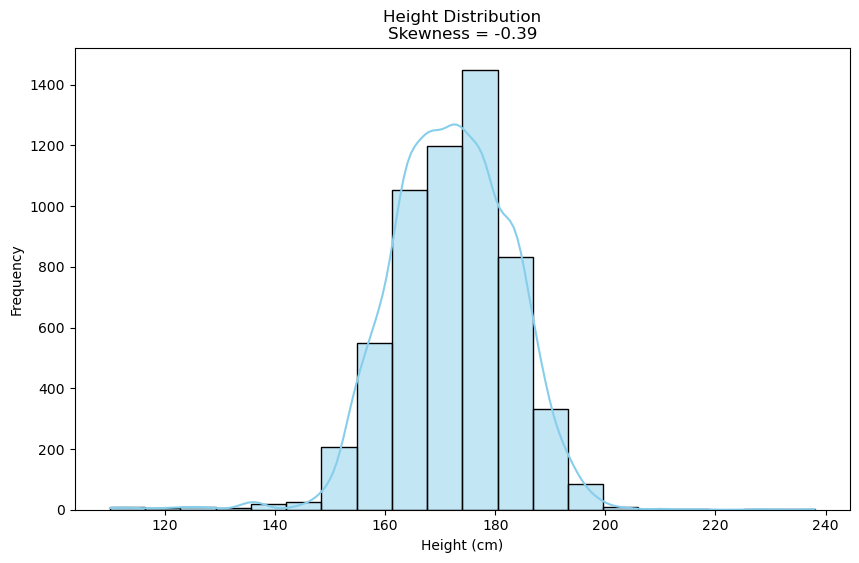

In [244]:
# Plot histogram and density plot together
plt.figure(figsize=(10, 6))
sns.histplot(data['height'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title(f'Height Distribution\nSkewness = {height_skewness:.2f}')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

# Display the plot
plt.show()

`height` is slightly negatively skewed. 

####  `weight` visualisation

In [247]:
# Calculate skewness for all numerical variables
weight_skewness = skew(data['weight'])

# Display skewness values
print("Skewness of weight variable:")
print(weight_skewness)

Skewness of weight variable:
1.1399349321112286


<function matplotlib.pyplot.show(close=None, block=None)>

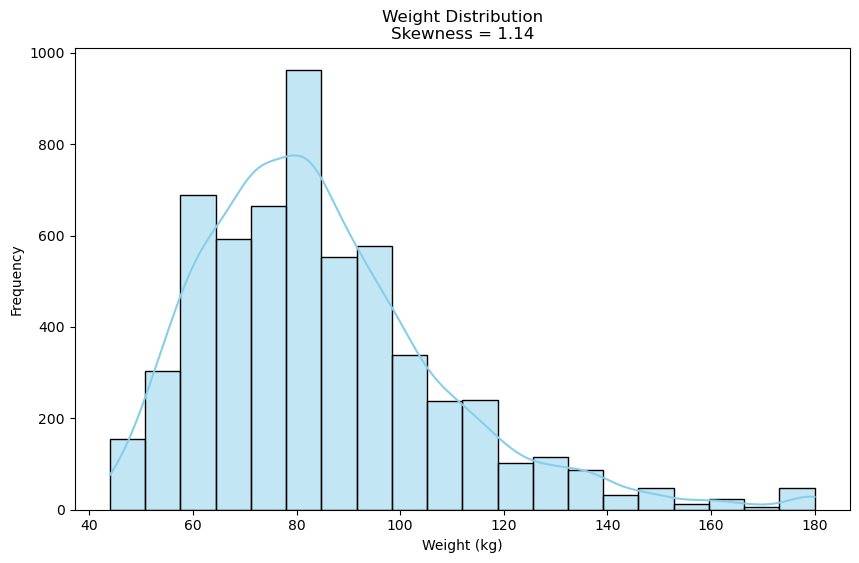

In [248]:
# Plot histogram and density plot together
plt.figure(figsize=(10, 6))
sns.histplot(data['weight'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title(f'Weight Distribution\nSkewness = {weight_skewness:.2f}')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Display the plot
plt.show

`weight` is positively skewed.

--------------

####  `bmi` visualisation

In [252]:
# Calculate skewness for all numerical variables
bmi_skewness = skew(data['bmi'])

# Display skewness values
print("Skewness of bmi variable:")
print(bmi_skewness)

Skewness of bmi variable:
1.9760371241195895


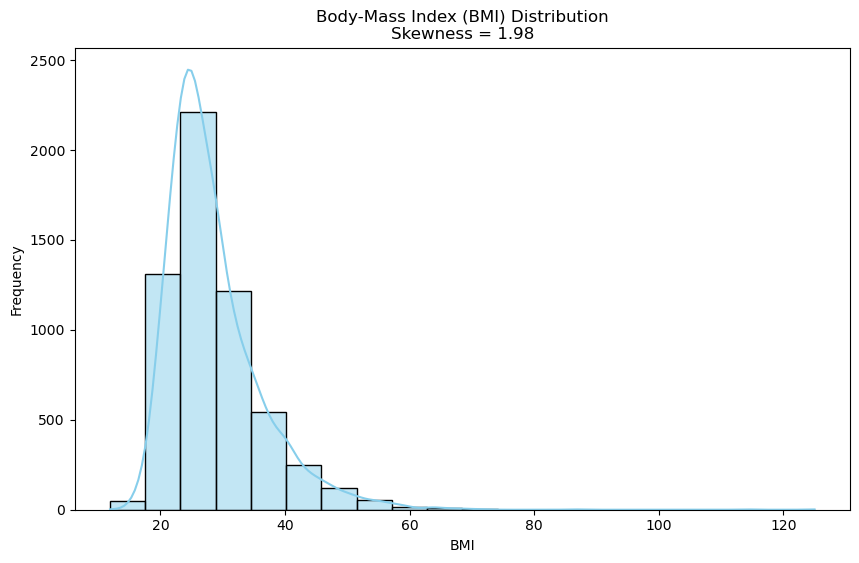

In [253]:
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title(f'Body-Mass Index (BMI) Distribution\nSkewness = {bmi_skewness:.2f}')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Display the plot
plt.show()

`bmi` is positively skewed.

--------------

#### `blood_type` visualisation

In [257]:
print(data['blood_type'].describe())

count        5689
unique          9
top       unknown
freq         1784
Name: blood_type, dtype: object


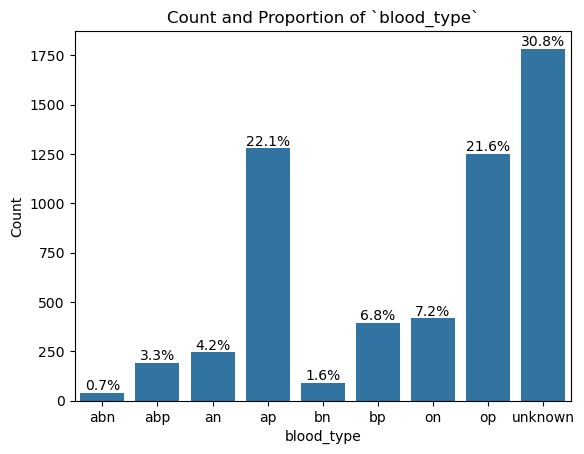

In [258]:
blood_type_count = sns.countplot(data=data, x='blood_type')

total = len(data)
for bar in blood_type_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    blood_type_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

blood_type_count.set_ylabel('Count')
blood_type_count.set_title('Count and Proportion of `blood_type`')
plt.show()

Out of all the non-null data for `blood_type`, most respondents have indicated they do not know their blood type.

The next most frequent `blood_type` values in the provided dataset are A+ and O+.

-----

#### `insurance` visualisation

count     4497
unique       3
top        yes
freq      3544
Name: insurance, dtype: object


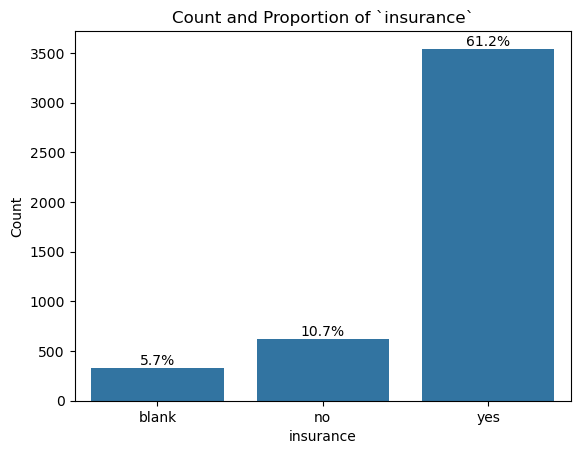

In [262]:
print(data['insurance'].describe())

# ----- countplot -----

insurance_count = sns.countplot(data=data, x='insurance')

total = len(data)
for bar in insurance_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    insurance_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

insurance_count.set_ylabel('Count')
insurance_count.set_title('Count and Proportion of `insurance`')
plt.show()

Out of all the non-null data for `insurance`, most respondents have indicated they have health insurance.

-----

#### `income` visualisation

count     4636
unique       5
top        med
freq      2142
Name: income, dtype: object


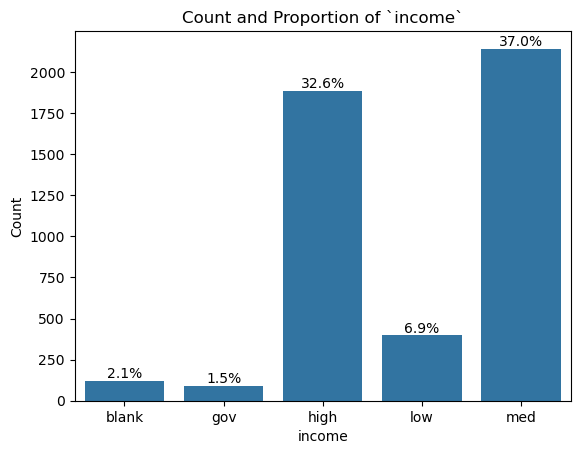

In [266]:
print(data['income'].describe())

# ----- countplot -----

income_count = sns.countplot(data=data, x='income')

total = len(data)
for bar in income_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    income_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

income_count.set_ylabel('Count')
income_count.set_title('Count and Proportion of `income`')
plt.show()

Out of all the non-null data for `income`, most respondents have indicated they have medium income.

-----

#### `smoking` visualisation

count      5753
unique        8
top       never
freq       3713
Name: smoking, dtype: object


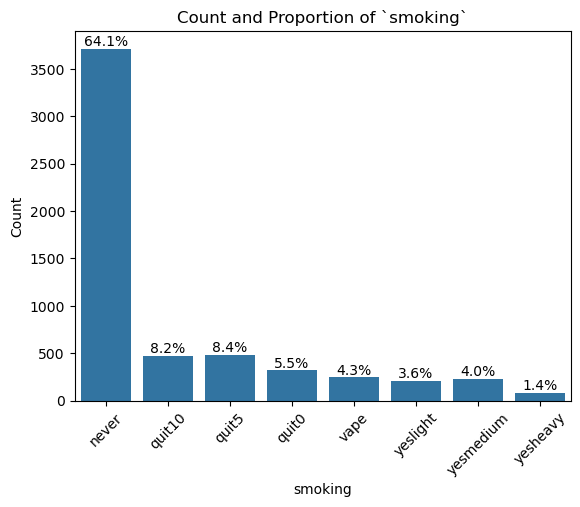

In [270]:
print(data['smoking'].describe())

# ----- countplot -----

order = ['never', 'quit10', 'quit5', 'quit0', 'vape', 'yeslight', 'yesmedium', 'yesheavy']

smoking_count = sns.countplot(data=data, x='smoking', order=order)

total = len(data)
for bar in smoking_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    smoking_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

smoking_count.set_ylabel('Count')
smoking_count.set_title('Count and Proportion of `smoking`')

plt.xticks(rotation=45)

plt.show()

Of the non-null responses, most people have never smoked.

-----

#### `alcohol` visualisation

This field is part categorical as there is a number set for all those who have never drunk alcohol. Let's investigate this separately.

In [275]:
data_plus_alcohol_fields = data.copy()

# there are 38 null values for `alcohol`

data_plus_alcohol_fields['never_had_alcohol'] = data_plus_alcohol_fields['alcohol'].apply(
    lambda x: 1 if x == -1 else (np.nan if pd.isna(x) else 0)
)

data_plus_alcohol_fields['number_of_drinking_days'] = data_plus_alcohol_fields['alcohol'].replace(-1, np.nan)

count    5751.000000
mean        0.333855
std         0.471630
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: never_had_alcohol, dtype: float64


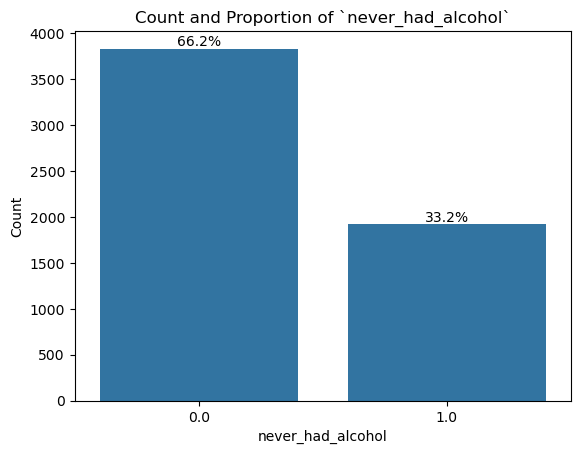

In [276]:
print(data_plus_alcohol_fields['never_had_alcohol'].describe())

# ----- countplot -----

never_had_alcohol_count = sns.countplot(data=data_plus_alcohol_fields, x='never_had_alcohol')

total = len(data_plus_alcohol_fields)
for bar in never_had_alcohol_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    never_had_alcohol_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

never_had_alcohol_count.set_ylabel('Count')
never_had_alcohol_count.set_title('Count and Proportion of `never_had_alcohol`')
plt.show()

Out of the non-null values for `never_had_alcohol`, most people have had alcohol.

In [278]:
# Calculate skewness for alcohol data re: number_of_drinking_days
number_of_drinking_days_skewness = skew(data_plus_alcohol_fields['number_of_drinking_days'].dropna())  # Drop NaN values

# Display skewness values
print("Skewness of `number_of_drinking_days` variable:")
print(number_of_drinking_days_skewness)

Skewness of `number_of_drinking_days` variable:
1.4948820293684468


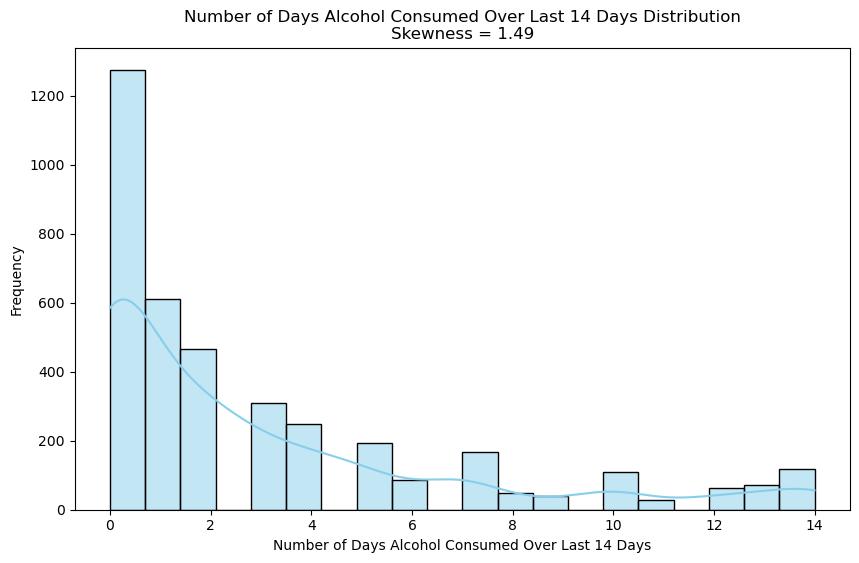

In [279]:
plt.figure(figsize=(10, 6))
sns.histplot(data_plus_alcohol_fields['number_of_drinking_days'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title(f'Number of Days Alcohol Consumed Over Last 14 Days Distribution\nSkewness = {number_of_drinking_days_skewness:.2f}')
plt.xlabel('Number of Days Alcohol Consumed Over Last 14 Days')
plt.ylabel('Frequency')

# Display the plot
plt.show()

`number_of_drinking_days` is positively skewed. Most people haven't had a drink over the last 14 days.

---------

#### `cocaine` visualisation

This field is part categorical as there is a number set for all those who have never had cocaine. Let's investigate this separately.

In [284]:
data_plus_cocaine_fields = data.copy()

# there are 36 null values for `cocaine`

data_plus_cocaine_fields['never_had_cocaine'] = data_plus_cocaine_fields['cocaine'].apply(
    lambda x: 1 if x == -1 else (np.nan if pd.isna(x) else 0)
)

data_plus_cocaine_fields['number_of_days_with_cocaine'] = data_plus_cocaine_fields['cocaine'].replace(-1, np.nan)

count    1430.000000
mean        0.753846
std         0.430920
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: never_had_cocaine, dtype: float64


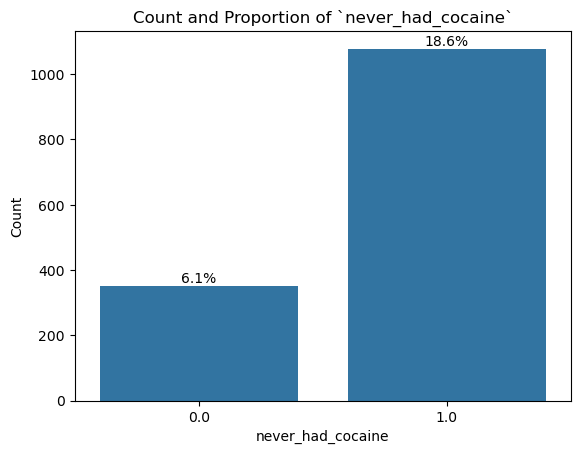

In [285]:
print(data_plus_cocaine_fields['never_had_cocaine'].describe())

# ----- countplot -----

never_had_cocaine_count = sns.countplot(data=data_plus_cocaine_fields, x='never_had_cocaine')

total = len(data_plus_cocaine_fields)
for bar in never_had_cocaine_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    never_had_cocaine_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

never_had_cocaine_count.set_ylabel('Count')
never_had_cocaine_count.set_title('Count and Proportion of `never_had_cocaine`')
plt.show()

Out of the non-null values for `never_had_cocaine`, most people have never had cocaine.

In [287]:
# Calculate skewness for alcohol data re: number_of_drinking_days
number_of_days_with_cocaine_skewness = skew(data_plus_cocaine_fields['number_of_days_with_cocaine'].dropna())  # Drop NaN values

# Display skewness values
print("Skewness of `number_of_days_with_cocaine` variable:")
print(number_of_days_with_cocaine_skewness)

Skewness of `number_of_days_with_cocaine` variable:
3.385923879183356


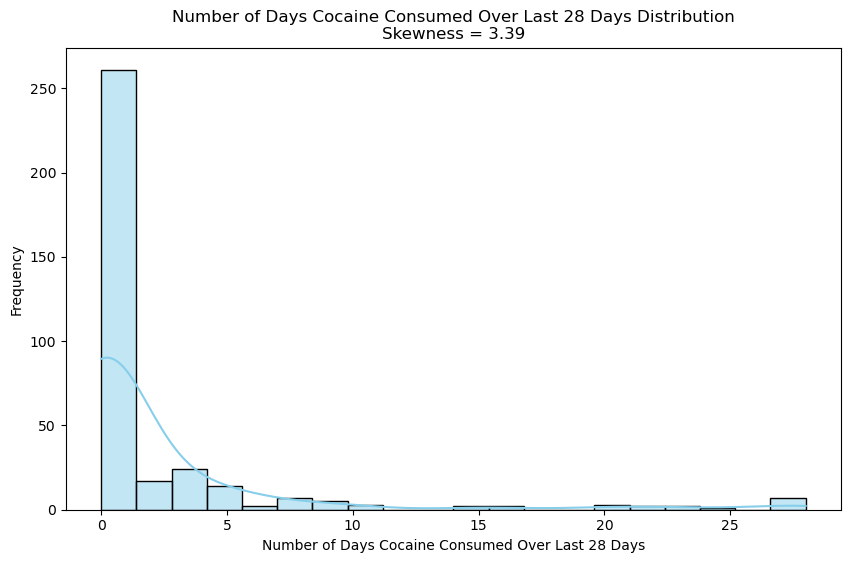

In [288]:
plt.figure(figsize=(10, 6))
sns.histplot(data_plus_cocaine_fields['number_of_days_with_cocaine'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title(f'Number of Days Cocaine Consumed Over Last 28 Days Distribution\nSkewness = {number_of_days_with_cocaine_skewness:.2f}')
plt.xlabel('Number of Days Cocaine Consumed Over Last 28 Days')
plt.ylabel('Frequency')

# Display the plot
plt.show()

`number_of_days_with_cocaine` is positively skewed. Most people have not consumed cocaine over the last 28 days.

---------

#### `contacts_count` visualisation

In [292]:
# Calculate skewness for all numerical variables
contacts_count_skewness = skew(data['contacts_count'].dropna()) # Drop NaN values

# Display skewness values
print("Skewness of contacts_count variable:")
print(contacts_count_skewness)

Skewness of contacts_count variable:
0.9281222936586563


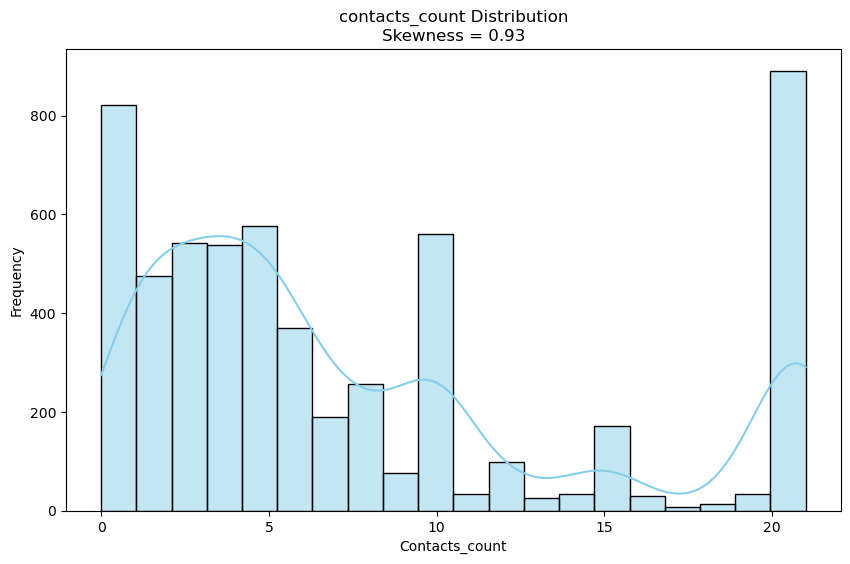

In [293]:
plt.figure(figsize=(10, 6))
sns.histplot(data['contacts_count'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title(f'contacts_count Distribution\nSkewness = {contacts_count_skewness:.2f}')
plt.xlabel('Contacts_count')
plt.ylabel('Frequency')

# Display the plot
plt.show()

`contacts_count` is positively skewed.

---------

#### `public_transport_count` visualisation

In [297]:
# Calculate skewness for all numerical variables
public_transport_count_skewness = skew(data['public_transport_count'].dropna())  # Drop NaN values

# Display skewness values
print("Skewness of public_transport_count variable:")
print(public_transport_count_skewness)

Skewness of public_transport_count variable:
5.680151853884231


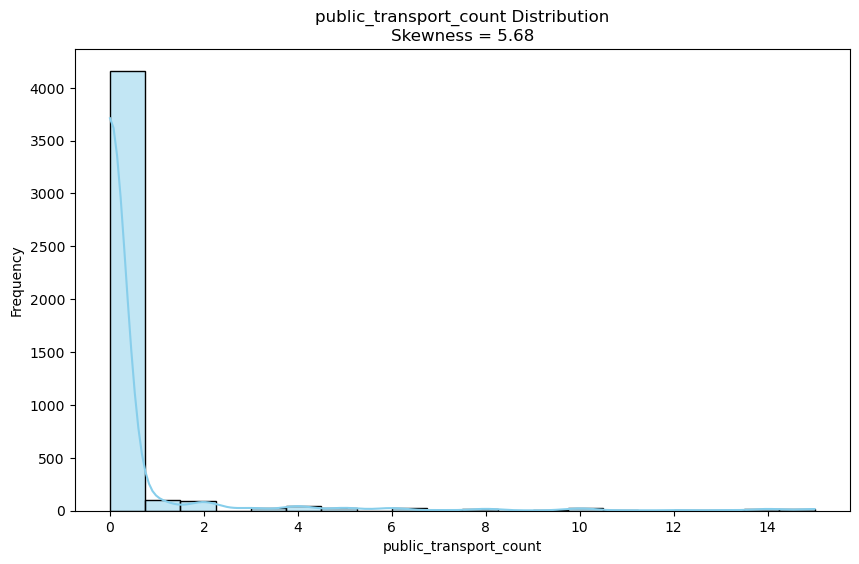

In [298]:
plt.figure(figsize=(10, 6))
sns.histplot(data['public_transport_count'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title(f'public_transport_count Distribution\nSkewness = {public_transport_count_skewness:.2f}')
plt.xlabel('public_transport_count')
plt.ylabel('Frequency')

# Display the plot
plt.show()

`public_transport_count` is highly positively skewed. The majority of respondents have not used public transport recently.

#### `working` visualisation

count        5747
unique          5
top       stopped
freq         1732
Name: working, dtype: object


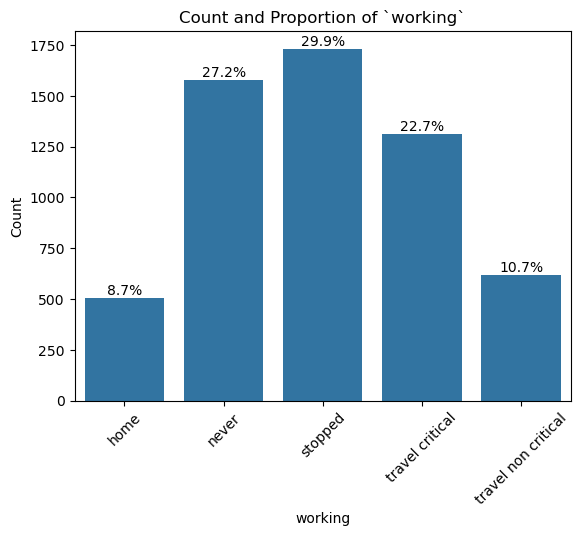

In [301]:
print(data['working'].describe())

# ----- countplot -----

working_count = sns.countplot(data=data, x='working')

total = len(data)
for bar in working_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    working_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

working_count.set_ylabel('Count')
working_count.set_title('Count and Proportion of `working`')

plt.xticks(rotation=45)
plt.show()

The majority of respondents with non-null values for `working` have reported `stopped` work at the time of the survey.

-----

#### `worried` visualisation

count     4518.0
unique       5.0
top          4.0
freq      2079.0
Name: worried, dtype: float64


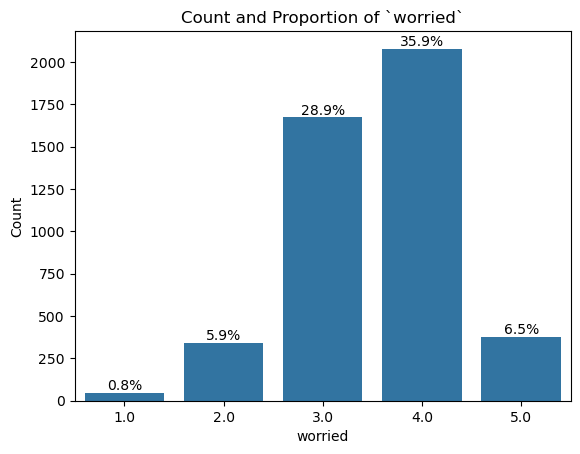

In [305]:
print(data['worried'].describe())

# ----- countplot -----

worried_count = sns.countplot(data=data, x='worried')

total = len(data)
for bar in worried_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    worried_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

worried_count.set_ylabel('Count')
worried_count.set_title('Count and Proportion of `worried`')

plt.show()

The majority of respondents with non-null values for `worried` have reported a rating of `4.0` at the time of the survey.

-----

#### `covid19_positive` visualisation

count    5789.000000
mean        0.403351
std         0.490612
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: covid19_positive, dtype: float64


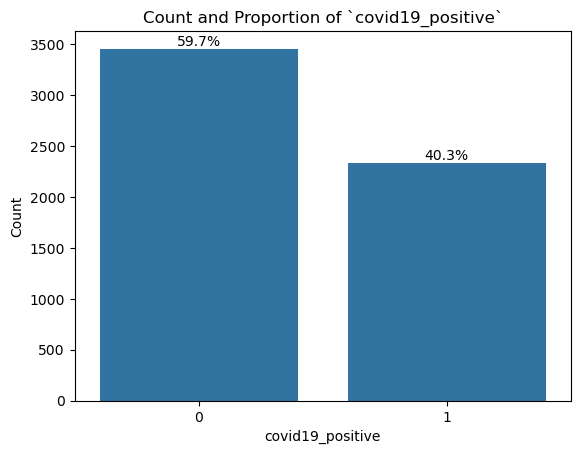

In [309]:
print(data['covid19_positive'].describe())

# ----- countplot -----

covid19_positive_count = sns.countplot(data=data, x='covid19_positive')

total = len(data)
for bar in covid19_positive_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    covid19_positive_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

covid19_positive_count.set_ylabel('Count')
covid19_positive_count.set_title('Count and Proportion of `covid19_positive`')

plt.show()

The majority of respondents for `covid19_positive` have reported not being `covid19_positive` at the time of the survey.

-----

#### `covid19_symptoms` visualisation

count    5789.000000
mean        0.172223
std         0.377607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: covid19_symptoms, dtype: float64


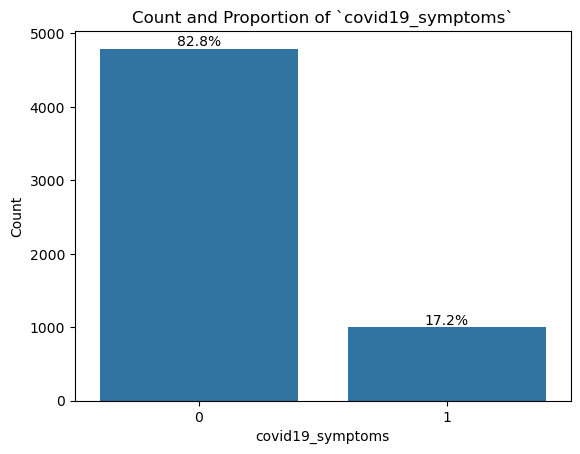

In [313]:
print(data['covid19_symptoms'].describe())

# ----- countplot -----

covid19_symptoms_count = sns.countplot(data=data, x='covid19_symptoms')

total = len(data)
for bar in covid19_symptoms_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    covid19_symptoms_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

covid19_symptoms_count.set_ylabel('Count')
covid19_symptoms_count.set_title('Count and Proportion of `covid19_symptoms`')

plt.show()

The majority of respondents for `covid19_symptoms` have reported not showing `covid19_symptoms` at the time of the survey.

-----

#### `covid19_contact` visualisation

count    5789.000000
mean        0.170841
std         0.376403
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: covid19_contact, dtype: float64


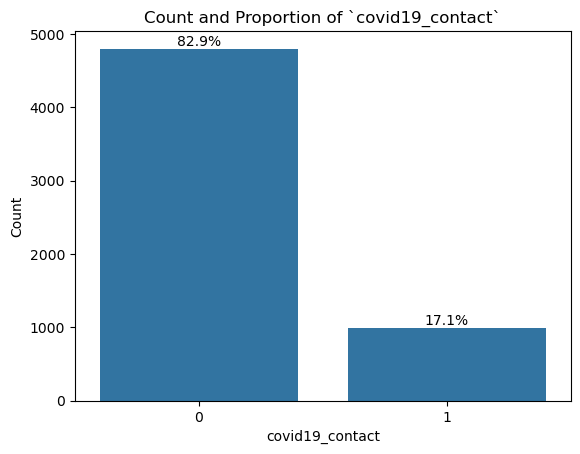

In [317]:
print(data['covid19_contact'].describe())

# ----- countplot -----

covid19_contact_count = sns.countplot(data=data, x='covid19_contact')

total = len(data)
for bar in covid19_contact_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    covid19_contact_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

covid19_contact_count.set_ylabel('Count')
covid19_contact_count.set_title('Count and Proportion of `covid19_contact`')

plt.show()

The majority of respondents for `covid19_contact` have reported not having a `covid19_contact` at the time of the survey.

-----

#### `asthma` visualisation

count    5789.000000
mean        0.130765
std         0.337173
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: asthma, dtype: float64


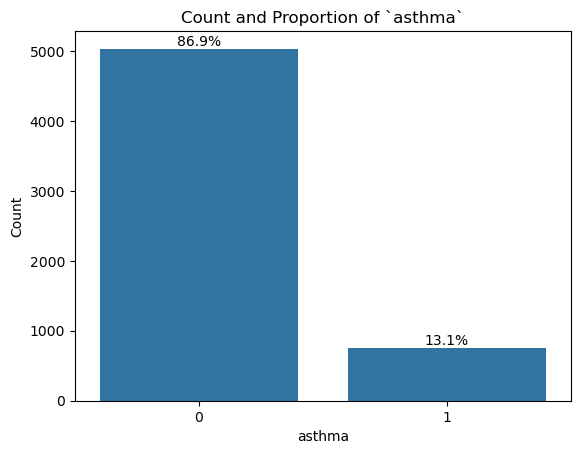

In [321]:
print(data['asthma'].describe())

# ----- countplot -----

asthma_count = sns.countplot(data=data, x='asthma')

total = len(data)
for bar in asthma_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    asthma_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

asthma_count.set_ylabel('Count')
asthma_count.set_title('Count and Proportion of `asthma`')

plt.show()

The majority of respondents for `asthma` have reported not having asthma at the time of the survey.

-----

#### `kidney_disease` visualisation

count    5789.000000
mean        0.010883
std         0.103760
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: kidney_disease, dtype: float64


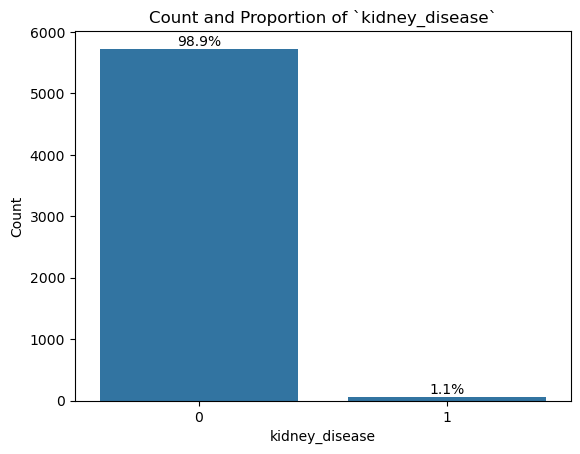

In [325]:
print(data['kidney_disease'].describe())

# ----- countplot -----

kidney_disease_count = sns.countplot(data=data, x='kidney_disease')

total = len(data)
for bar in kidney_disease_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    kidney_disease_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

kidney_disease_count.set_ylabel('Count')
kidney_disease_count.set_title('Count and Proportion of `kidney_disease`')

plt.show()

The majority of respondents for `kidney_disease` have reported not having kidney disease at the time of the survey.

-----

#### `liver_disease` visualisation

count    5789.000000
mean        0.007601
std         0.086857
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: liver_disease, dtype: float64


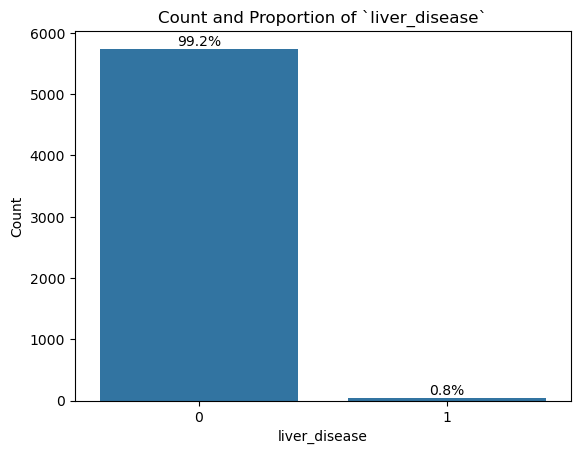

In [329]:
print(data['liver_disease'].describe())

# ----- countplot -----

liver_disease_count = sns.countplot(data=data, x='liver_disease')

total = len(data)
for bar in liver_disease_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    liver_disease_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

liver_disease_count.set_ylabel('Count')
liver_disease_count.set_title('Count and Proportion of `liver_disease`')

plt.show()

The majority of respondents for `liver_disease` have reported not having liver disease at the time of the survey.

-----

#### `compromised_immune` visualisation

count    5789.000000
mean        0.059596
std         0.236757
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: compromised_immune, dtype: float64


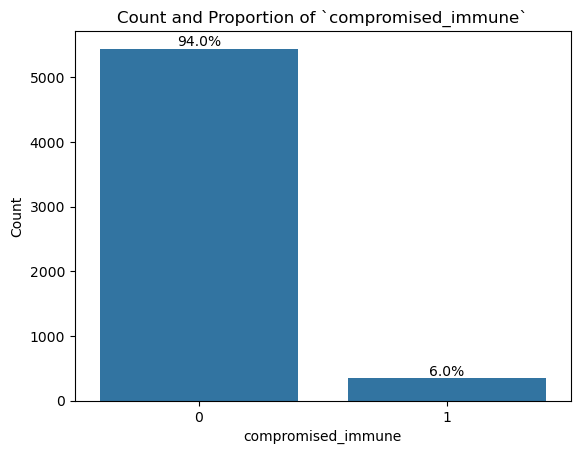

In [333]:
print(data['compromised_immune'].describe())

# ----- countplot -----

compromised_immune_count = sns.countplot(data=data, x='compromised_immune')

total = len(data)
for bar in compromised_immune_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    compromised_immune_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

compromised_immune_count.set_ylabel('Count')
compromised_immune_count.set_title('Count and Proportion of `compromised_immune`')

plt.show()

The majority of respondents for `compromised_immune` have reported not having compromised immunity at the time of the survey.

-----

#### `heart_disease` visualisation

count    5789.000000
mean        0.031439
std         0.174516
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64


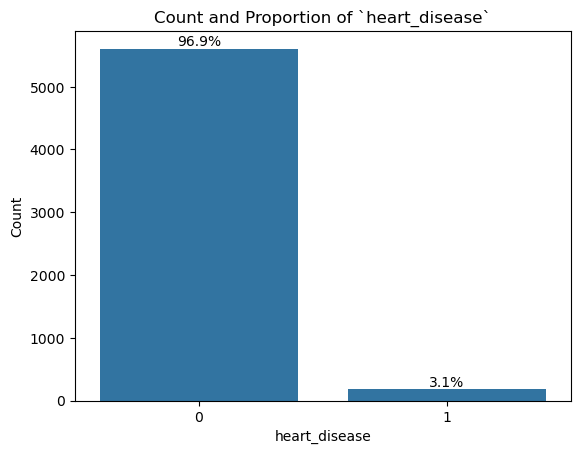

In [337]:
print(data['heart_disease'].describe())

# ----- countplot -----

heart_disease_count = sns.countplot(data=data, x='heart_disease')

total = len(data)
for bar in heart_disease_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    heart_disease_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

heart_disease_count.set_ylabel('Count')
heart_disease_count.set_title('Count and Proportion of `heart_disease`')

plt.show()

The majority of respondents for `heart_disease` have reported not having heart disease at the time of the survey.

-----

#### `lung_disease` visualisation

count    5789.000000
mean        0.023320
std         0.150931
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: lung_disease, dtype: float64


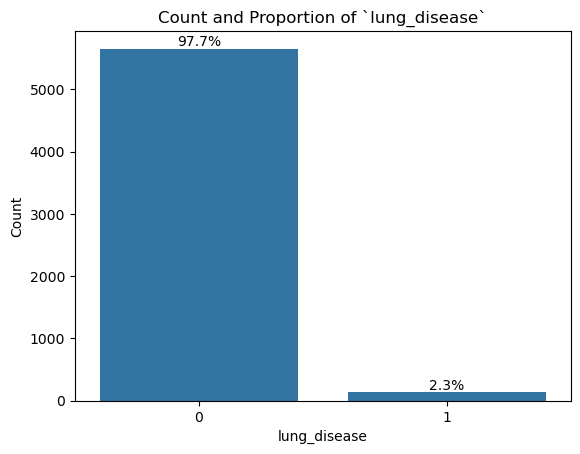

In [341]:
print(data['lung_disease'].describe())

# ----- countplot -----

lung_disease_count = sns.countplot(data=data, x='lung_disease')

total = len(data)
for bar in lung_disease_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    lung_disease_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

lung_disease_count.set_ylabel('Count')
lung_disease_count.set_title('Count and Proportion of `lung_disease`')

plt.show()

The majority of respondents for `lung_disease` have reported not having lung_disease at the time of the survey.

-----

#### `diabetes` visualisation

count    5789.000000
mean        0.081016
std         0.272883
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: diabetes, dtype: float64


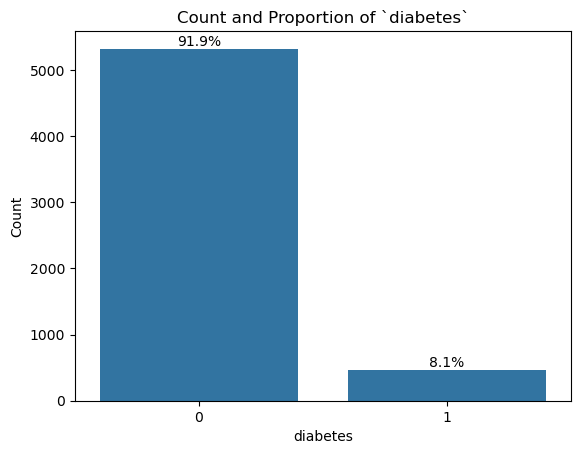

In [345]:
print(data['diabetes'].describe())

# ----- countplot -----

diabetes_count = sns.countplot(data=data, x='diabetes')

total = len(data)
for bar in diabetes_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    diabetes_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

diabetes_count.set_ylabel('Count')
diabetes_count.set_title('Count and Proportion of `diabetes`')

plt.show()

The majority of respondents for `diabetes` have reported not having diabetes at the time of the survey.

-----

#### `hiv_positive` visualisation

count    5789.000000
mean        0.003973
std         0.062912
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hiv_positive, dtype: float64


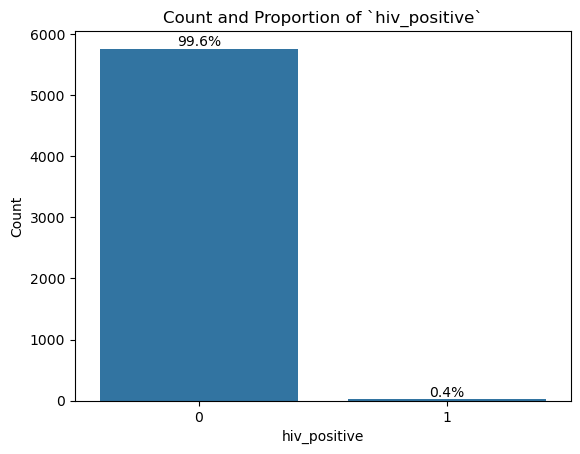

In [349]:
print(data['hiv_positive'].describe())

# ----- countplot -----

hiv_positive_count = sns.countplot(data=data, x='hiv_positive')

total = len(data)
for bar in hiv_positive_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    hiv_positive_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

hiv_positive_count.set_ylabel('Count')
hiv_positive_count.set_title('Count and Proportion of `hiv_positive`')

plt.show()

The majority of respondents for `hiv_positive` have reported not being HIV-positive at the time of the survey.

-----

#### `other_chronic` visualisation

count    5789.000000
mean        0.065296
std         0.247069
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: other_chronic, dtype: float64


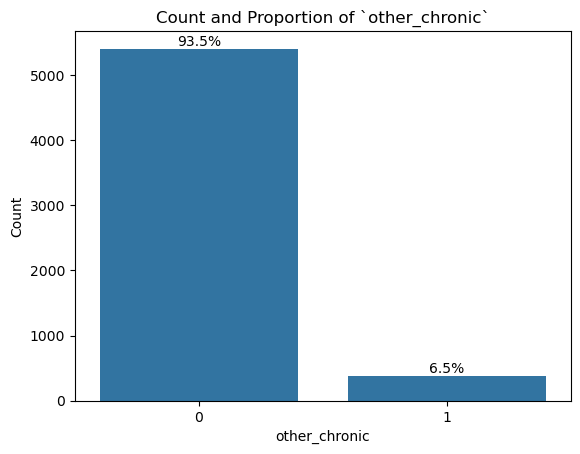

In [353]:
print(data['other_chronic'].describe())

# ----- countplot -----

other_chronic_count = sns.countplot(data=data, x='other_chronic')

total = len(data)
for bar in other_chronic_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    other_chronic_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

other_chronic_count.set_ylabel('Count')
other_chronic_count.set_title('Count and Proportion of `other_chronic`')

plt.show()

The majority of respondents for `other_chronic` have reported no other chronic conditions at the time of the survey.

-----

#### `nursing_home` visualisation

count    5789.000000
mean        0.003628
std         0.060125
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: nursing_home, dtype: float64


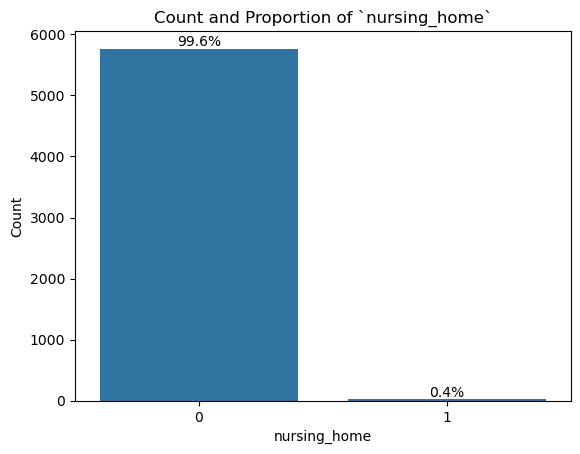

In [357]:
print(data['nursing_home'].describe())

# ----- countplot -----

nursing_home_count = sns.countplot(data=data, x='nursing_home')

total = len(data)
for bar in nursing_home_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    nursing_home_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

nursing_home_count.set_ylabel('Count')
nursing_home_count.set_title('Count and Proportion of `nursing_home`')

plt.show()

The majority of respondents for `nursing_home` have reported not residing in a nursing home at the time of the survey.

-----

#### `health_worker` visualisation

count    5789.000000
mean        0.084643
std         0.278374
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: health_worker, dtype: float64


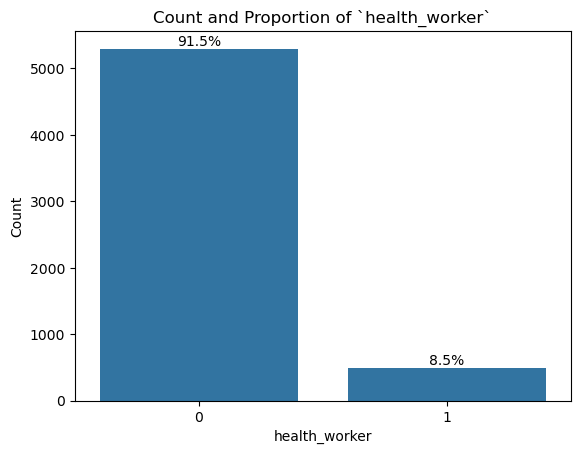

In [361]:
print(data['health_worker'].describe())

# ----- countplot -----

health_worker_count = sns.countplot(data=data, x='health_worker')

total = len(data)
for bar in health_worker_count.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    health_worker_count.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        percentage,
        ha='center',
        va='bottom',
        fontsize=10
    )

health_worker_count.set_ylabel('Count')
health_worker_count.set_title('Count and Proportion of `health_worker`')

plt.show()

The majority of respondents for `health_worker` have reported not being a health worker at the time of the survey.

-----

#### `risk_infection` visualisation

In [365]:
# Calculate skewness for all numerical variables
risk_infection_skewness = skew(data['risk_infection'])

# Display skewness values
print("Skewness of risk_infection variable:")
print(risk_infection_skewness)

Skewness of risk_infection variable:
0.088129556664703


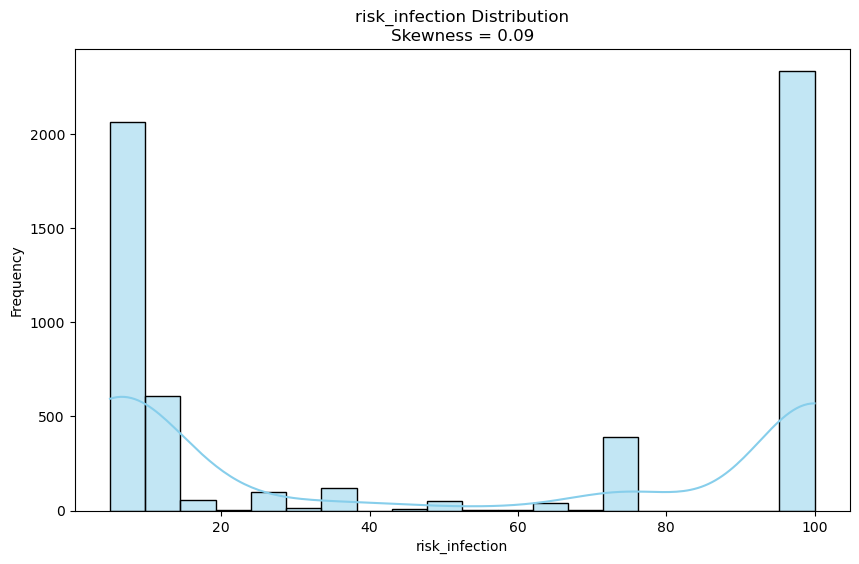

In [366]:
plt.figure(figsize=(10, 6))
sns.histplot(data['risk_infection'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title(f'risk_infection Distribution\nSkewness = {risk_infection_skewness:.2f}')
plt.xlabel('risk_infection')
plt.ylabel('Frequency')

# Display the plot
plt.show()

`risk_infection` is mostly symmetrical.

------

#### `risk_mortality` visualisation

In [370]:
# Calculate skewness
risk_mortality_skewness = skew(data['risk_mortality'])

# Display skewness values
print("Skewness of risk_mortality variable:")
print(risk_mortality_skewness)

Skewness of risk_mortality variable:
7.255965213257452


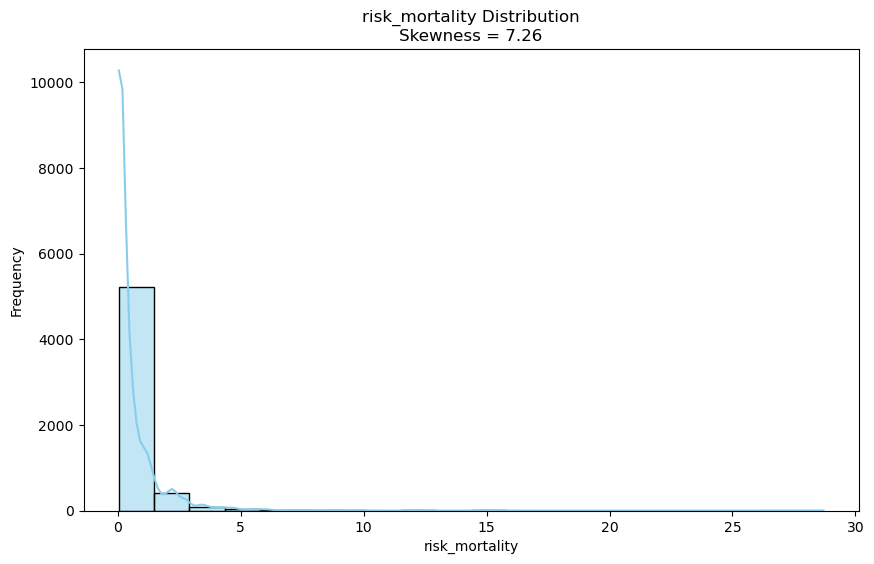

In [371]:
plt.figure(figsize=(10, 6))
sns.histplot(data['risk_mortality'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title(f'risk_mortality Distribution\nSkewness = {risk_mortality_skewness:.2f}')
plt.xlabel('risk_mortality')
plt.ylabel('Frequency')

# Display the plot
plt.show()

`risk_mortality` is positively skewed. Most respondents have a very low risk of mortality.

-----------

## Data preparation

### Fields containing null values

In [376]:
## showing count in all fields

print(data.isnull().sum())

survey_date                  0
region                       2
country                      2
ip_latitude                  0
ip_longitude                 0
gender                       0
age                          0
height                       0
weight                       0
bmi                          0
blood_type                 100
insurance                 1292
income                    1153
smoking                     36
alcohol                     38
cocaine                   4359
contacts_count              42
public_transport_count    1217
working                     42
worried                   1271
covid19_positive             0
covid19_symptoms             0
covid19_contact              0
asthma                       0
kidney_disease               0
liver_disease                0
compromised_immune           0
heart_disease                0
lung_disease                 0
diabetes                     0
hiv_positive                 0
other_chronic                0
nursing_

We will need to decide how to deal with the 12 fields containing NaN values.

### Fields with missing values

#### `region` and `country`

We have two `NaN` values for `region` and `country`. As `ip_latitude` and `ip_longitude` are together also representative of location, we can use this data to set the missing `region` and `country`.

In [381]:
## showing the data as it looks currently

data.loc[data['region'].isna() & data['country'].isna(), ['region', 'country', 'ip_latitude', 'ip_longitude']]

,region,country,ip_latitude,ip_longitude
3543,NaN,NaN,35.6896,51.4332
5788,NaN,NaN,51.5875,-0.1807


Looking at the two sets of latitude and longitude, row `3543` indicates a location in Iran and `5788` indicates the respondent is in the UK.

In [383]:
## setting `region` and `country` for the two rows based on this information

data2 = data.copy()

data2.loc[3543, ['region', 'country']] = ['AS', 'IR']

data2.loc[5788, ['region', 'country']] = ['EU', 'GB']

In [384]:
## checking new values

data2.loc[data['region'].isna() & data['country'].isna(), ['region', 'country', 'ip_latitude', 'ip_longitude']]

,region,country,ip_latitude,ip_longitude
3543,AS,IR,35.6896,51.4332
5788,EU,GB,51.5875,-0.1807


-----

#### `insurance`

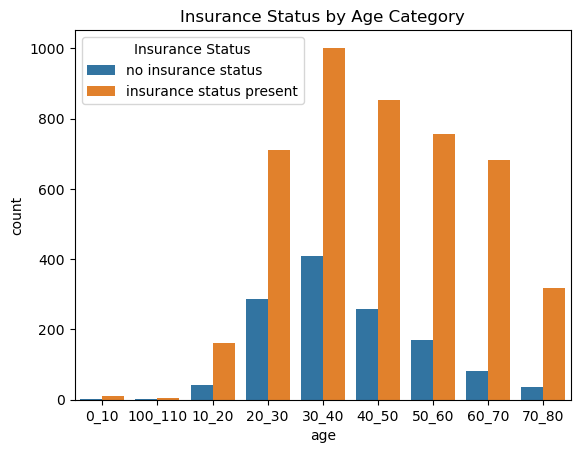

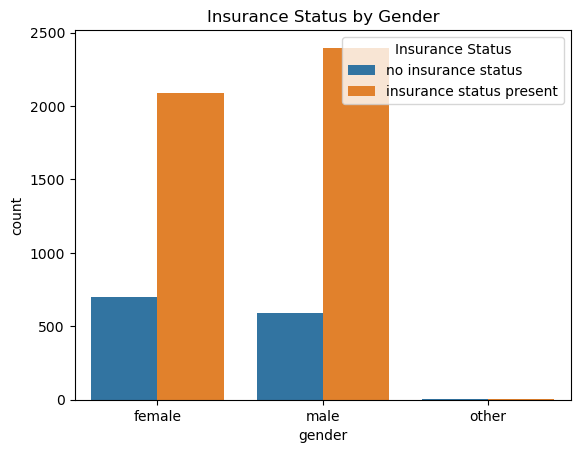

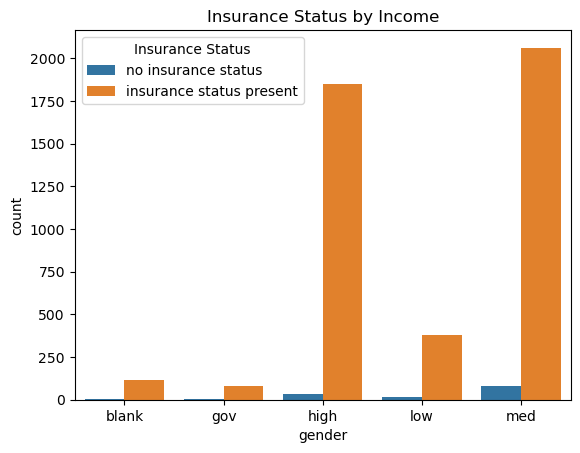

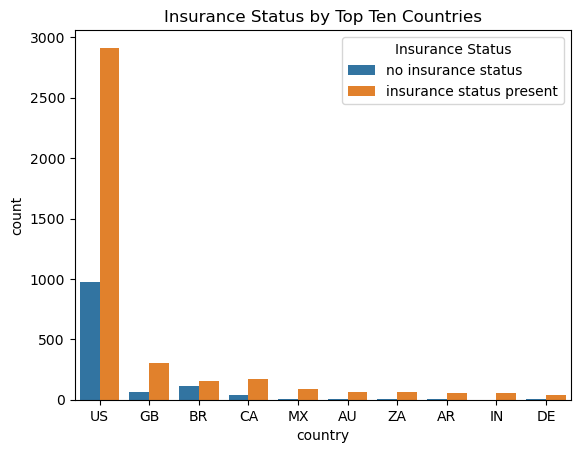

In [387]:
# Investigating relationships between rows with populated and missing `insurance` values

# Set `insurance_status_present` to 1 if `insurance` is a string, otherwise 0 if it's NaN
data['insurance_status_present'] = np.where(data['insurance'].notna(), 1, 0)

# Count plot showing the distribution of insurance status within age categories
sns.countplot(data=data, x='age', hue='insurance_status_present')
plt.title("Insurance Status by Age Category")
plt.xlabel("age")
plt.ylabel("count")
plt.legend(title='Insurance Status', labels=['no insurance status', 'insurance status present'])
plt.show()

# Count plot showing the distribution of insurance status within gender categories
sns.countplot(data=data, x='gender', hue='insurance_status_present')
plt.title("Insurance Status by Gender")
plt.xlabel("gender")
plt.ylabel("count")
plt.legend(title='Insurance Status', labels=['no insurance status', 'insurance status present'])
plt.show()

# Count plot showing the distribution of insurance status within income categories
sns.countplot(data=data, x='income', hue='insurance_status_present')
plt.title("Insurance Status by Income")
plt.xlabel("gender")
plt.ylabel("count")
plt.legend(title='Insurance Status', labels=['no insurance status', 'insurance status present'])
plt.show()

# Count plot showing the distribution of insurance status within country categories
sns.countplot(data=data, x='country', hue='insurance_status_present', order=data.country.value_counts().iloc[:10].index)
plt.title("Insurance Status by Top Ten Countries")
plt.xlabel("country")
plt.ylabel("count")
plt.legend(title='Insurance Status', labels=['no insurance status', 'insurance status present'])
plt.show()

In [388]:
data['insurance'].value_counts()

insurance
yes      3544
no        622
blank     331
Name: count, dtype: int64

There doesn't seem to be any relationship between null `insurance` values and other variables.
`insurance` has taken the following populated values in the data provided:
- `yes` - 3544 rows
- `no` - 622 rows
- `blank` - 331 rows

There are 1292 rows with null `insurance` data - this is just over 22% of the whole dataset. Dropping all of these rows to handle null `insurance` values would result in significant data loss over the other fields.

We could simply assign `blank` to all the null `insurance` values as we don't know what those values are. However, we don't know if the respondent originally entered data in the survey or not, or if the data was lost at some other point.

We could assign the general mode of populated `insurance` values to rows with NaN `insurance` values.

-----

#### `blood_type`

There are 100 null values in the `blood_type` field.

Dropping these rows would constitute 1.72% of the rows in the provided data set. This is quite low and we could consider dropping these.

We could impute by mode, by finding the most frequent `blood_type` per country as `blood_type` is highly heritable. The ideal value to group by for `blood_type` heritability would be `race`, which exists in the original dataset as information on ethnicity.

#### `income`

There are 1153 null values in the `income` field.

This makes up 19.9% of rows in the provided data set. Dropping such a large quantity of rows would result in significant data loss over the other fields. Imputation would be ideal.

As there is no numerical value associated with the categories and it is simply a personal rating of one's income (outside of `blank`, where the person explicitly did not answer), it would be difficult to relate with other fields in the dataset.

#### `smoking`

There are 36 `NaN` values in the `smoking` field.

This is only 0.62% of rows in the total dataset, this would not result in a lot of data loss if the `NaN` fields were dropped.

Again, mode imputation is possible.

#### `alcohol`

There are 38 `NaN` values in the `alcohol` field.

This is only 0.66% of rows in the total dataset, this would not result in a lot of data loss if the `NaN` fields were dropped.

Again, mode imputation is possible.

#### `cocaine`

There are 4359 `NaN` values in the `cocaine` field.

This is about 75.3% of the total dataset. Dropping rows is not going to be an appropriate resolution.

It might be better to drop the whole column when it comes to data mining.

#### `contacts_count`

There are 42 `NaN` values in the `contacts_count` field.

This is about 0.73% of the rows in the dataset. Dropping these rows would be a reasonable solution.

#### `public_transport_count`

There are 1217 `NaN` values in the `public_transport_count` field.

This is about 21% of the dataset. Imputation via mode or other means is preferable.

#### `working`

There are 42 `NaN` values in the `working` field.

This is about 0.73% of the rows in the dataset. Dropping these rows would not result in significant data loss.

#### `worried`

There are 271 `NaN` values in the `worried` field.

This is about 22% of the entire data set: we should look into imputation for this field.

### Wholesale data imputation based on regression

There are a number of Python libraries and functions that handle imputation. Here, we will use `sklearn`'s `IterativeImputer` function to look at patterns with respect to the other populated variables and assign values to NaN fields based on surrounding data points.

    We can impute all remaining 10 fields with data via `IterativeImputer`, which imputes data based on existing relationships between other populated variables in the dataset ([reference](https://scikit-learn.org/1.5/modules/generated/sklearn.impute.IterativeImputer.html)). However, it's important to note that `IterativeImputer` is an experimental feature in the `sklearn` module.

But we first have to prepare the data to use the `Imputer` function. Moreover, we have enough information from the overlap between `region`, `country`, `ip_latitude` and `ip_longitude` to assign the two missing values in `region` and `country`.

We should continue to keep track of unpopulated, originally `NaN` values in a number of binary fields.

In [411]:
# for some reason, get_dummies() isn't providing the appropriate columns when converting to dummy fields in bulk.
# convert separately and then merge
# first we need a version of the dataset without categorical data

data_numerical_columns = data2.drop(['insurance', 'income', 'region', 'country', 'gender', 'age', 'blood_type', 'smoking', 'worried', 'working'], axis=1)

print(data_numerical_columns.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   survey_date             5789 non-null   datetime64[ns]
 1   ip_latitude             5789 non-null   float64       
 2   ip_longitude            5789 non-null   float64       
 3   height                  5789 non-null   int64         
 4   weight                  5789 non-null   int64         
 5   bmi                     5789 non-null   float64       
 6   alcohol                 5751 non-null   Int64         
 7   cocaine                 1430 non-null   Int64         
 8   contacts_count          5747 non-null   Int64         
 9   public_transport_count  4572 non-null   Int64         
 10  covid19_positive        5789 non-null   int64         
 11  covid19_symptoms        5789 non-null   int64         
 12  covid19_contact         5789 non-null   int64   

In [412]:
# Generate insurance dummies with "blank" as a separate column
insurance_dummies_only = pd.get_dummies(data['insurance'], prefix='insurance', dummy_na=True)

# Generate income dummies with "blank" as a separate column
income_dummies_only = pd.get_dummies(data['income'], prefix='income', dummy_na=True)

# Generate blood_type dummies
blood_type_dummies_only = pd.get_dummies(data['blood_type'], prefix='blood_type', dummy_na=True)

# Generate age dummies
age_dummies_only = pd.get_dummies(data['age'], prefix='age', dummy_na=True)

# Generate region dummies
region_dummies_only = pd.get_dummies(data['region'], prefix='region', dummy_na=True)

# Generate country dummies
country_dummies_only = pd.get_dummies(data['country'], prefix='country', dummy_na=True)

# Generate gender dummies
gender_dummies_only = pd.get_dummies(data['gender'], prefix='gender', dummy_na=True)

# Generate smoking dummies
smoking_dummies_only = pd.get_dummies(data['smoking'], prefix='smoking', dummy_na=True)

# Generate working dummies
working_dummies_only = pd.get_dummies(data['working'], prefix='working', dummy_na=True)

# Generate worried dummies
worried_dummies_only = pd.get_dummies(data['worried'], prefix='worried', dummy_na=True)


In [413]:
# check region dummy columns

print(region_dummies_only.head())

region_dummies_only.value_counts()

   region_AF  region_AS  region_EU  region_NA  region_OC  region_SA  \
0       True      False      False      False      False      False   
1       True      False      False      False      False      False   
2       True      False      False      False      False      False   
3       True      False      False      False      False      False   
4       True      False      False      False      False      False   

   region_nan  
0       False  
1       False  
2       False  
3       False  
4       False  


region_AF  region_AS  region_EU  region_NA  region_OC  region_SA  region_nan
False      False      False      True       False      False      False         4225
                      True       False      False      False      False          801
                      False      False      False      True       False          399
           True       False      False      False      False      False          206
True       False      False      False      False      False      False           79
False      False      False      False      True       False      False           77
                                            False      False      True             2
Name: count, dtype: int64

In [414]:
# check insurance dummy columns

print(insurance_dummies_only.head())

insurance_dummies_only['insurance_blank'].value_counts()

   insurance_blank  insurance_no  insurance_yes  insurance_nan
0            False         False           True          False
1            False         False           True          False
2            False         False           True          False
3            False         False           True          False
4            False         False           True          False


insurance_blank
False    5458
True      331
Name: count, dtype: int64

In [415]:
# check smoking dummy columns

print(smoking_dummies_only.head())

# list

print(smoking_dummies_only.columns)

   smoking_never  smoking_quit0  smoking_quit10  smoking_quit5  smoking_vape  \
0           True          False           False          False         False   
1           True          False           False          False         False   
2           True          False           False          False         False   
3          False          False           False          False         False   
4           True          False           False          False         False   

   smoking_yesheavy  smoking_yeslight  smoking_yesmedium  smoking_nan  
0             False             False              False        False  
1             False             False              False        False  
2             False             False              False        False  
3             False             False               True        False  
4             False             False              False        False  
Index(['smoking_never', 'smoking_quit0', 'smoking_quit10', 'smoking_quit5',
       'smo

In [416]:
# check worried dummy columns

print(worried_dummies_only.head())

# list

print(worried_dummies_only.columns)

   worried_1.0  worried_2.0  worried_3.0  worried_4.0  worried_5.0  \
0        False        False         True        False        False   
1        False        False         True        False        False   
2        False        False         True        False        False   
3        False        False         True        False        False   
4        False        False        False         True        False   

   worried_nan  
0        False  
1        False  
2        False  
3        False  
4        False  
Index(['worried_1.0', 'worried_2.0', 'worried_3.0', 'worried_4.0',
       'worried_5.0', 'worried_nan'],
      dtype='object')


In [417]:
# check income dummy columns

print(income_dummies_only.head())

income_dummies_only['income_blank'].value_counts()

   income_blank  income_gov  income_high  income_low  income_med  income_nan
0         False       False        False       False        True       False
1         False       False        False       False        True       False
2         False       False        False       False        True       False
3         False       False        False       False        True       False
4         False       False        False       False        True       False


income_blank
False    5667
True      122
Name: count, dtype: int64

In [418]:
# check blood_type dummy columns

print(blood_type_dummies_only.head())

   blood_type_abn  blood_type_abp  blood_type_an  blood_type_ap  \
0           False           False          False          False   
1           False           False          False          False   
2           False           False          False          False   
3           False           False          False          False   
4           False           False          False          False   

   blood_type_bn  blood_type_bp  blood_type_on  blood_type_op  \
0          False          False          False           True   
1          False           True          False          False   
2          False          False          False          False   
3          False           True          False          False   
4          False          False          False           True   

   blood_type_unknown  blood_type_nan  
0               False           False  
1               False           False  
2                True           False  
3               False           False  
4     

In [419]:
# check country dummy columns

print(country_dummies_only.head())

# list

print(country_dummies_only.columns)

   country_AD  country_AE  country_AM  country_AR  country_AT  country_AU  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   country_AW  country_AZ  country_BA  country_BD  ...  country_SI  \
0       False       False       False       False  ...       False   
1       False       False       False       False  ...       False   
2       False       False       False       False  ...       False   
3       False       False       False       False  ...       False   
4       False       False       False       False  ...       False   

   country_SK  country_SV  country_TH  country_TR  country_UA  country_US  \
0       False       False       False  

In [420]:
# check age dummy columns

print(age_dummies_only.head())

   age_0_10  age_100_110  age_10_20  age_20_30  age_30_40  age_40_50  \
0     False        False      False       True      False      False   
1     False        False      False      False      False      False   
2     False        False      False      False      False       True   
3     False        False      False      False      False       True   
4     False        False      False      False       True      False   

   age_50_60  age_60_70  age_70_80  age_nan  
0      False      False      False    False  
1      False      False       True    False  
2      False      False      False    False  
3      False      False      False    False  
4      False      False      False    False  


In [421]:
# check working dummy columns

print(working_dummies_only.head())

# list

print(working_dummies_only.columns)

   working_home  working_never  working_stopped  working_travel critical  \
0         False          False            False                    False   
1         False           True            False                    False   
2         False          False             True                    False   
3         False          False            False                     True   
4         False          False            False                     True   

   working_travel non critical  working_nan  
0                         True        False  
1                        False        False  
2                        False        False  
3                        False        False  
4                        False        False  
Index(['working_home', 'working_never', 'working_stopped',
       'working_travel critical', 'working_travel non critical',
       'working_nan'],
      dtype='object')


In [422]:
# looking good, let's put all dummies columns together
data_categorical_columns = pd.concat([income_dummies_only, 
                                      insurance_dummies_only, 
                                      blood_type_dummies_only, 
                                      age_dummies_only, 
                                      region_dummies_only, 
                                      country_dummies_only, 
                                      gender_dummies_only, 
                                      smoking_dummies_only, 
                                      working_dummies_only, 
                                      worried_dummies_only], axis=1)

# ... change all these to binary to avoid warnings

data_categorical_columns = data_categorical_columns.astype('Int64')

# ... and set dummies of each category to `NaN` when the corresponding `..._nan` field is 1, so that the `IterativeImputer` knows what to replace

data_categorical_columns.loc[data_categorical_columns['insurance_nan'] == 1, ['insurance_yes', 'insurance_no', 'insurance_blank']] = np.nan
data_categorical_columns.loc[data_categorical_columns['blood_type_nan'] == 1, ['blood_type_abp', 'blood_type_an', 'blood_type_ap', 'blood_type_bn', 'blood_type_bp', 'blood_type_on', 'blood_type_op', 'blood_type_unknown']] = np.nan
data_categorical_columns.loc[data_categorical_columns['income_nan'] == 1, ['income_high', 'income_med', 'income_low', 'income_gov', 'income_blank']] = np.nan
data_categorical_columns.loc[data_categorical_columns['age_nan'] == 1, ['age_0_10', 'age_10_20', 'age_20_30', 'age_30_40', 'age_40_50', 'age_50_60', 'age_60_70', 'age_70_80', 'age_100_110']] = np.nan
data_categorical_columns.loc[data_categorical_columns['region_nan'] == 1, ['region_AF', 'region_AS', 'region_EU', 'region_NA', 'region_OC', 'region_SA']] = np.nan
data_categorical_columns.loc[data_categorical_columns['country_nan'] == 1, ['country_AD', 'country_AE', 'country_AM', 'country_AR', 'country_AT',
                                                                               'country_AU', 'country_AW', 'country_AZ', 'country_BA', 'country_BD',
                                                                               'country_BE', 'country_BG', 'country_BH', 'country_BM', 'country_BR',
                                                                               'country_BS', 'country_CA', 'country_CH', 'country_CL', 'country_CO',
                                                                               'country_CR', 'country_CZ', 'country_DE', 'country_DK', 'country_DO',
                                                                               'country_DZ', 'country_EC', 'country_EG', 'country_ES', 'country_ET',
                                                                               'country_FI', 'country_FR', 'country_GB', 'country_GE', 'country_GR',
                                                                               'country_GT', 'country_HK', 'country_HN', 'country_HR', 'country_HU',
                                                                               'country_ID', 'country_IE', 'country_IL', 'country_IN', 'country_IQ',
                                                                               'country_IR', 'country_IT', 'country_JE', 'country_JP', 'country_KE',
                                                                               'country_KR', 'country_KY', 'country_KZ', 'country_LT', 'country_LU',
                                                                               'country_LV', 'country_MA', 'country_MD', 'country_MK', 'country_MM',
                                                                               'country_MO', 'country_MT', 'country_MU', 'country_MX', 'country_MY',
                                                                               'country_MZ', 'country_NA', 'country_NL', 'country_NO', 'country_NP',
                                                                               'country_NZ', 'country_PA', 'country_PE', 'country_PH', 'country_PK',
                                                                               'country_PL', 'country_PR', 'country_PS', 'country_PT', 'country_QA',
                                                                               'country_RO', 'country_RS', 'country_RU', 'country_SA', 'country_SE',
                                                                               'country_SG', 'country_SI', 'country_SK', 'country_SV', 'country_TH',
                                                                               'country_TR', 'country_UA', 'country_US', 'country_VI', 'country_ZA']] = np.nan
data_categorical_columns.loc[data_categorical_columns['gender_nan'] == 1, ['gender_male', 'gender_female', 'gender_other']] = np.nan
data_categorical_columns.loc[data_categorical_columns['smoking_nan'] == 1, ['smoking_never', 'smoking_quit0', 'smoking_quit5', 'smoking_quit10',
                                                                               'smoking_vape','smoking_yeslight', 'smoking_yesmedium', 'smoking_yesheavy']] = np.nan
data_categorical_columns.loc[data_categorical_columns['worried_nan'] == 1, ['worried_1.0', 'worried_2.0', 'worried_3.0', 'worried_4.0','worried_5.0']] = np.nan
data_categorical_columns.loc[data_categorical_columns['working_nan'] == 1, ['working_home', 'working_never', 'working_stopped',
                                                                               'working_travel critical', 'working_travel non critical']] = np.nan

# ... and print

print(data_categorical_columns.head())


   income_blank  income_gov  income_high  income_low  income_med  income_nan  \
0             0           0            0           0           1           0   
1             0           0            0           0           1           0   
2             0           0            0           0           1           0   
3             0           0            0           0           1           0   
4             0           0            0           0           1           0   

   insurance_blank  insurance_no  insurance_yes  insurance_nan  ...  \
0                0             0              1              0  ...   
1                0             0              1              0  ...   
2                0             0              1              0  ...   
3                0             0              1              0  ...   
4                0             0              1              0  ...   

   working_stopped  working_travel critical  working_travel non critical  \
0               

In [423]:
# let's put numerical and categorical (dummied) columns together

numerical_and_categorical_columns = pd.concat([data_numerical_columns, data_categorical_columns], axis=1)

print(numerical_and_categorical_columns.head())


  survey_date  ip_latitude  ip_longitude  height  weight   bmi  alcohol  \
0  2020-09-06     -33.9052       18.3821     188     104  29.4        0   
1  2020-06-17     -26.1891       28.0225     164      62  23.0        0   
2  2020-06-20     -27.9752       27.1068     164      78  29.0        2   
3  2020-06-20     -26.3227       28.1050     170      60  20.7       -1   
4  2020-06-22     -29.8587       31.0653     164      64  23.7       -1   

   cocaine  contacts_count  public_transport_count  ...  working_stopped  \
0     <NA>               9                       0  ...                0   
1     <NA>               2                       0  ...                0   
2     <NA>               5                       0  ...                1   
3     <NA>               6                       0  ...                0   
4     <NA>               2                       0  ...                0   

   working_travel critical  working_travel non critical  working_nan  \
0                   

In [424]:
# we need to drop the datetime column because sklearn can't handle `datetime64[ns]` data types

numerical_and_categorical_columns = numerical_and_categorical_columns.drop(['survey_date'], axis=1)

In [425]:
print(numerical_and_categorical_columns.head())

   ip_latitude  ip_longitude  height  weight   bmi  alcohol  cocaine  \
0     -33.9052       18.3821     188     104  29.4        0     <NA>   
1     -26.1891       28.0225     164      62  23.0        0     <NA>   
2     -27.9752       27.1068     164      78  29.0        2     <NA>   
3     -26.3227       28.1050     170      60  20.7       -1     <NA>   
4     -29.8587       31.0653     164      64  23.7       -1     <NA>   

   contacts_count  public_transport_count  covid19_positive  ...  \
0               9                       0                 1  ...   
1               2                       0                 1  ...   
2               5                       0                 1  ...   
3               6                       0                 1  ...   
4               2                       0                 1  ...   

   working_stopped  working_travel critical  working_travel non critical  \
0                0                        0                            1   
1     

In [426]:
## checking a row with NaN data

row = numerical_and_categorical_columns.iloc[4505]

print(row.to_dict())

{'ip_latitude': 32.7872, 'ip_longitude': 72.7267, 'height': 178.0, 'weight': 80.0, 'bmi': 25.2, 'alcohol': 0.0, 'cocaine': 0.0, 'contacts_count': 6.0, 'public_transport_count': None, 'covid19_positive': 1.0, 'covid19_symptoms': 0.0, 'covid19_contact': 0.0, 'asthma': 0.0, 'kidney_disease': 0.0, 'liver_disease': 0.0, 'compromised_immune': 0.0, 'heart_disease': 0.0, 'lung_disease': 0.0, 'diabetes': 0.0, 'hiv_positive': 0.0, 'other_chronic': 0.0, 'nursing_home': 0.0, 'health_worker': 0.0, 'risk_infection': 100.0, 'risk_mortality': 0.05, 'survey_date_as_int': 86.0, 'income_blank': None, 'income_gov': None, 'income_high': None, 'income_low': None, 'income_med': None, 'income_nan': 1.0, 'insurance_blank': None, 'insurance_no': None, 'insurance_yes': None, 'insurance_nan': 1.0, 'blood_type_abn': 0.0, 'blood_type_abp': 0.0, 'blood_type_an': 0.0, 'blood_type_ap': 1.0, 'blood_type_bn': 0.0, 'blood_type_bp': 0.0, 'blood_type_on': 0.0, 'blood_type_op': 0.0, 'blood_type_unknown': 0.0, 'blood_type_na

In [ ]:
# using IterativeImputer from sklearn module to impute missing values using the default Bayesian ridge regression setting

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0)

data_imputed = imputer.fit_transform(numerical_and_categorical_columns)

## converting to dataframe

data_imputed = pd.DataFrame(data_imputed, columns=numerical_and_categorical_columns.columns)

In [ ]:
print(data_imputed.head())

In [ ]:
row = data_imputed.iloc[4505]

print(row.to_dict())

In [ ]:
# we have estimates for the NaN values! let's take the largest value for each row for each group of dummies with NaN values, set that to 1 and set the others as 0.

def set_largest_to_one(row, columns):
    max_column_value = row[columns].idxmax()
    row[columns] = 0
    row[max_column_value] = 1
    return row

# set up lists for each group of dummies with NaN values that have been replaced

insurance_column_list = ['insurance_yes', 'insurance_no', 'insurance_blank']
blood_type_column_list = ['blood_type_abn', 'blood_type_abp', 'blood_type_an', 'blood_type_ap', 'blood_type_bn', 'blood_type_bp', 'blood_type_on', 'blood_type_op', 'blood_type_unknown']
income_column_list = ['income_gov', 'income_blank', 'income_high', 'income_low', 'income_med']
age_column_list = ['age_0_10', 'age_100_110', 'age_10_20', 'age_20_30', 'age_30_40', 'age_40_50', 'age_50_60', 'age_60_70', 'age_70_80']
region_column_list = ['region_AF', 'region_AS', 'region_EU', 'region_NA', 'region_OC', 'region_SA']
country_column_list = ['country_AD', 'country_AE', 'country_AM', 'country_AR', 'country_AT',
                       'country_AU', 'country_AW', 'country_AZ', 'country_BA', 'country_BD',
                       'country_BE', 'country_BG', 'country_BH', 'country_BM', 'country_BR',
                       'country_BS', 'country_CA', 'country_CH', 'country_CL', 'country_CO',
                       'country_CR', 'country_CZ', 'country_DE', 'country_DK', 'country_DO',
                       'country_DZ', 'country_EC', 'country_EG', 'country_ES', 'country_ET',
                       'country_FI', 'country_FR', 'country_GB', 'country_GE', 'country_GR',
                       'country_GT', 'country_HK', 'country_HN', 'country_HR', 'country_HU',
                       'country_ID', 'country_IE', 'country_IL', 'country_IN', 'country_IQ',
                       'country_IR', 'country_IT', 'country_JE', 'country_JP', 'country_KE',
                       'country_KR', 'country_KY', 'country_KZ', 'country_LT', 'country_LU',
                       'country_LV', 'country_MA', 'country_MD', 'country_MK', 'country_MM',
                       'country_MO', 'country_MT', 'country_MU', 'country_MX', 'country_MY',
                       'country_MZ', 'country_NA', 'country_NL', 'country_NO', 'country_NP',
                       'country_NZ', 'country_PA', 'country_PE', 'country_PH', 'country_PK',
                       'country_PL', 'country_PR', 'country_PS', 'country_PT', 'country_QA',
                       'country_RO', 'country_RS', 'country_RU', 'country_SA', 'country_SE',
                       'country_SG', 'country_SI', 'country_SK', 'country_SV', 'country_TH',
                       'country_TR', 'country_UA', 'country_US', 'country_VI', 'country_ZA']
gender_column_list = ['gender_male', 'gender_female', 'gender_other']
smoking_column_list = ['smoking_never', 'smoking_quit0', 'smoking_quit10', 'smoking_quit5',
                       'smoking_vape', 'smoking_yesheavy', 'smoking_yeslight', 'smoking_yesmedium']
worried_column_list = ['worried_1.0', 'worried_2.0', 'worried_3.0', 'worried_4.0','worried_5.0']
working_column_list = ['working_home', 'working_never', 'working_stopped',
                       'working_travel critical', 'working_travel non critical']

list_of_lists = [insurance_column_list, blood_type_column_list, income_column_list, age_column_list, region_column_list, country_column_list, gender_column_list, smoking_column_list, worried_column_list, working_column_list] 

# Apply the function to each row in the DataFrame for each group of dummy fields
for list in list_of_lists:
    data_imputed = data_imputed.apply(lambda row: set_largest_to_one(row, list), axis=1)

# Check the modified dataframe
print(data_imputed)


In [ ]:
# Check that we no longer have any nulls
var = data_imputed.isnull().sum()
print(var.to_string())


## checking a row with NaN data

row = data_imputed.iloc[4505]
print(row.to_dict())

In [ ]:
# convert `survey_date_as_int` back to datetime
data_imputed['survey_date'] = pd.to_datetime(min_date) + pd.to_timedelta(data_imputed['survey_date_as_int'], unit='D')

# Check the updated DataFrame
print(data_imputed[['survey_date_as_int', 'survey_date']])

# drop the int column
data_imputed = data_imputed.drop(['survey_date_as_int'], axis=1)

# check
print(data_imputed)

In [ ]:
# Round and adjust the imputed numerical columns so that they fit into their original definitions

data_imputed_rounded = data_imputed.copy()

data_imputed_rounded[['alcohol', 'cocaine', 'contacts_count', 'public_transport_count']] = data_imputed_rounded[['alcohol', 'cocaine', 'contacts_count', 'public_transport_count']].round(decimals=0)

# rows with values less than -1 should be set to -1 for `alcohol` field (to represent non-drinkers)

data_imputed_rounded.loc[data_imputed_rounded['alcohol'] < -1, ['alcohol']] = -1

# rows with values less than -1 should be set to -1 for `cocaine` field (to represent those who have never used cocaine)

data_imputed_rounded.loc[data_imputed_rounded['cocaine'] < -1, ['cocaine']] = -1

# for `contacts_count` field, 21 is reserved for >20 contacts

data_imputed_rounded.loc[data_imputed_rounded['contacts_count'] > 20, ['contacts_count']] = 21

# rows with values less than -1 should be set to 0 for `public_transport_count` field (to represent those who did not use public transport)

data_imputed_rounded.loc[data_imputed_rounded['public_transport_count'] < -1, ['public_transport_count']] = 0

# looking at the larger Nexoid dataset, there are no rows containing a value for greater than `15` for 'public_transport_count' across more than 900,000 records.
# it's likely that 'public_transport_count' works the same way as the `alcohol` field - if you took public transport more than 14 times then you are assigned `15` as the ceiling, but we don't know this for sure.


In [ ]:
# check

print(data_imputed_rounded)

In [ ]:
# check

data_imputed_rounded['alcohol'].value_counts()

In [ ]:
# check

data_imputed_rounded['cocaine'].value_counts()

In [ ]:
# check

data_imputed_rounded['contacts_count'].value_counts()

In [ ]:
# check

data_imputed_rounded['public_transport_count'].value_counts()

In [ ]:
cleaned_dataset = data_imputed_rounded.copy()

# consolidating the dummy columns back together, now that all the missing data has been imputed appropriately
# we can use the lists of columns created earlier for this
# we will retain the columns that indicate if a value in a field was originally null for further analysis


# function to put groups of dummy fields back together
def consolidate_dummy_columns(dataframe, columns):
    # each group of dummy fields starts with the same word - the original name of the column before it was dummied
    category_name = columns[0]
    dataframe[category_name] = dataframe[columns[1]].idxmax(axis=1).str.replace(columns[0] + '_', '')
    dataframe = dataframe.drop(columns=columns[1])
    return dataframe

list_of_lists = [['insurance', insurance_column_list], ['blood_type', blood_type_column_list], ['income', income_column_list], ['age', age_column_list], ['region', region_column_list], ['country', country_column_list], ['gender', gender_column_list], ['smoking', smoking_column_list], ['worried', worried_column_list], ['working', working_column_list]] 


for list in list_of_lists:
    cleaned_dataset = consolidate_dummy_columns(cleaned_dataset, list)
    
# check

print(cleaned_dataset)

In [ ]:
# check

var = cleaned_dataset.isnull().sum()
print(var.to_string())

Let's have a look at the fields missing larger amounts of data.

In [ ]:
# data before cleaning

data2['cocaine'].value_counts()

In [ ]:
# cleaned data

cleaned_dataset['cocaine'].value_counts()

In [ ]:
# data before cleaning

data2['insurance'].value_counts()

In [ ]:
# cleaned data

cleaned_dataset['insurance'].value_counts()

In [ ]:
# data before cleaning

data2['income'].value_counts()

In [ ]:
# cleaned data

cleaned_dataset['income'].value_counts()

In [ ]:
# data before cleaning

data2['worried'].value_counts()

In [ ]:
# cleaned data

cleaned_dataset['worried'].value_counts()

It looks like the `IterativeImputer` has imputed the mode for a number of the fields with missing data.

## TASK 3

### Relationship between `covid19_positive` and `smoking`

Visualising the two fields:

In [ ]:
import scipy.stats as stats

smoking_covid_19_positive_status = cleaned_dataset[['smoking','covid19_positive']]

smoking_covid_19_positive_status_with_count = smoking_covid_19_positive_status.groupby(['smoking', 'covid19_positive']).size().reset_index(name='count')

contingency_table = pd.pivot_table(smoking_covid_19_positive_status_with_count, values='count', index='covid19_positive', columns='smoking', aggfunc='sum', fill_value=0)

print(contingency_table)


In [ ]:
# Create the bar plot
sns.barplot(data=smoking_covid_19_positive_status_with_count, x='smoking', y='count', hue='covid19_positive')

# Customize the plot
plt.title('COVID-19 Positivity by Smoking Status')
plt.ylabel('Count')
plt.xlabel('Smoking Status')
plt.legend(title='COVID-19 Status')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Chi-square test via stats
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Cramer's V via numpy
n = contingency_table.to_numpy().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Chi-square: {chi2}, p-value: {p}, Cramer's V: {cramers_v}")

It seems like there is a very strong relationship between `smoking` status and `covid19_positive` status - however it is important to remember that there may be a number of confounding factors. For example, older people may be more likely to smoke and their age is what places them at higher likelihood of being covid-19 positive and not their smoking status.

This strong relationship between `smoking` status and `covid19_positive` status may cause inaccuracies and redundancy in modelling down the track - it may be useful to drop `smoking`.

#### Identifying further correlated pairs

We need to set up a correlation matrix with the dataset as numerical data.

In [ ]:
## going back to a version of the dataset with dummied, numerical data

# build the correlation matrix
corr_matrix = data_imputed_rounded.corr()

print(corr_matrix)

In [ ]:
# setting a threshold - if higher than 0.8 then these pairs point towards multicollinearity
threshold = 0.8

# finding pairs
highly_correlated = []

for column in corr_matrix.columns:
    for row in corr_matrix.index:
        if abs(corr_matrix.loc[row, column]) > threshold and row != column:
            highly_correlated.append((row, column, corr_matrix.loc[row, column]))

# display
for pair in highly_correlated:
    print(f"Variables: {pair[0]} and {pair[1]} have correlation {pair[2]:.2f}")

As per the above, it makes sense to retain only one of:
- `height`,`weight` and `bmi`
- `country`, `region` and `ip_latitude`/`ip_longitude`

The `NaN` columns are also correlated, meaning there might be a minimum subset of rows we can drop with maximum missing data to minimise the amount of other data being lost.

Retaining `bmi` and `country` makes the most sense - they result in the most readable information being preserved in the dataset without overlap.

`risk_infection` and `covid19_positivity` are also correlated. This makes sense - the Nexoid analysts would have used the survey data to build models around risk of infection and death based on the respondents' data. If we were to build our own models re: risk of covid19 positivity, using `risk_infection`, which is itself partially derived from `covid19_positivity`, would not work.

#### Appropriate data mining tasks for this data

We can certainly use this data to build a predictive model of Covid-19 mortality and infection risk (e.g. classification). Association mining is more suited to transactional data, however, we could also build up a profile of those likely to be covid19 positive via clustering. This overlaps with classification, however - it makes sense to build the models around mortality and infection risk and use the information gathered as part of this in the mentioned profile determination.

#### List of variables to use

- ~~`ip_latitude`~~ redundant
- ~~`ip_longitude`~~ redundant
- ~~`height`~~ redundant
- ~~`weight`~~ redundant
- `bmi`
- `alcohol`
- ~~`cocaine`~~ too much missing data
- `contacts_count`
- `public_transport_count`
- `covid19_positive`
- `covid19_symptoms`
- `covid19_contact`
- `asthma`
- `kidney_disease`
- `liver_disease`
- `compromised_immune`
- `heart_disease`
- `lung_disease`
- `diabetes`
- `hiv_positive`
- `other_chronic`
- `nursing_home`
- `health_worker`
- ~~`risk_infection`~~ derived value based on other values
- ~~`risk_mortality`~~ derived value based on other values
- ~~`survey_date`~~ irrelevant
- `insurance`
- `blood_type`
- `income`
- `age`
- ~~`region`~~ redundant
- `country`
- `gender`
- `smoking`
- `worried`
- `working`


In [ ]:
# dropping columns as mentioned above

final_dataset = cleaned_dataset[['country',
                                 'gender',
                                 'age',
                                 'bmi',
                                 'insurance',
                                 'income',
                                 'smoking',
                                 'alcohol',
                                 'contacts_count',
                                 'public_transport_count',
                                 'working',
                                 'worried',
                                 'covid19_positive', 
                                 'covid19_symptoms', 
                                 'covid19_contact', 
                                 'asthma',
                                 'kidney_disease', 
                                 'liver_disease', 
                                 'compromised_immune',
                                 'heart_disease', 
                                 'lung_disease', 
                                 'diabetes', 
                                 'hiv_positive',
                                 'other_chronic', 
                                 'nursing_home', 
                                 'health_worker']]
                                 
# exporting dataset to notebook directory

final_dataset.to_csv('final_nexoid_dataset.csv', index=False)

### Appendix 1: Understanding of fields included in data set, as they pertain to the original provided dataset

| Field                 | Description                                                                                                                                                                |
|-----------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| survey_date           | Date on which the data was collected, in the format M/D/YYYY                                                                                                               |
| region                | 2-letter continent code in which the data was collected (based on IP address). Possible values: AF, AN, AS, EU, NA, OC, SA                                               |
| country               | 2-letter country code representing the country in which the data was collected (based on IP address)                                                                      |
| ip_latitude           | Latitude associated with the IP address of submission (obfuscated slightly for personal privacy)                                                                         |
| ip_longitude          | Longitude associated with the IP address of submission (obfuscated slightly for personal privacy)                                                                        |
| gender                | Sex of the respondent. Possible values: male, female, other                                                                                                               |
| age                   | Age range of the respondent, in intervals of 10 years                                                                                                                     |
| height                | Height of the respondent, in cm                                                                                                                                           |
| weight                | Weight of the respondent, in kg                                                                                                                                           |
| bmi                   | Body mass index of the respondent                                                                                                                                         |
| blood_type            | Blood type of the respondent. Possible values: ap, an, bp, bn, abp, abn, op, on, unknown                                                                                        |
| insurance             | Does the respondent have private health insurance? Possible values: yes, no, blank                                                                                       |
| income                | Income level of the respondent. Possible values: high, med, low, blank, gov                                                                                             |
| smoking               | Does the respondent smoke or vape? Possible values: never, vape, yeslight, yesmedium, yesheavy, quit0, quit5, quit10                                                    |
| alcohol               | Number of the days the respondent has consumed alcohol over the past 14 days. Values range from 0 to 14. -1 is reserved for those who have never drunk alcohol.          |
| cocaine               | Number of the days the respondent has consumed cocaine over the past 28 days. Values range from 0 to 28. -1 is reserved for those who have never consumed cocaine.         |
| contacts_count        | Number of people the respondent was in close contact with over the past week. Values range from 0 to 20. 21 is reserved for >20 contacts.                                |
| public_transport_count| Number of people contacted by the person during public transportation                                                                                                     |
| working               | Working status: home (working from home), never (has never worked), stopped (is not working), travel critical, travel non critical                                         |
| worried               | On a scale of 1 - 5                                                                                                                                                       |
| covid19_positive      | 1 - positive, 0 - negative                                                                                                                                                 |
| covid19_symptoms      | 1 - symptoms present, 0 - no symptoms present                                                                                                                              |
| covid19_contact       | 1 - close contact had covid, 0 - no known close contact with covid                                                                                                       |
| asthma                | 1 - the person has asthma, 0 - the person does not have asthma                                                                                                            |
| kidney_disease        | 1 - the person has kidney disease, 0 - the person does not have kidney disease                                                                                             |
| liver_disease         | 1 - the person has liver disease, 0 - the person does not have liver disease                                                                                              |
| compromised_immune    | 1 - the person has a compromised immune system, 0 - the person does not have a compromised immune system                                                                  |
| heart_disease         | 1 - the person has heart disease, 0 - the person does not have heart disease                                                                                              |
| lung_disease          | 1 - the person has lung disease, 0 - the person does not have lung disease                                                                                               |
| diabetes              | 1 - the person has diabetes, 0 - the person does not have diabetes                                                                                                       |
| hiv_positive          | 1 - the person is hiv positive, 0 - the person is not hiv positive                                                                                                       |
| other_chronic         | 1 - the person has another chronic illness not mentioned here, 0 - the person does not have another chronic illness                                                      |
| nursing_home          | 1 - the person resides in a nursing home, 0 - the person does not reside in a nursing home                                                                               |
| health_worker         | 1 - the person is a health care worker, 0 - the person is not a health care worker                                                                                        |
| risk_infection        | The risk percentage of covid-19 infection, based on the rest of the survey data and generated via Nexoid models                                                           |
| risk_mortality        | The risk of death for this person, based on the rest of the survey data and generated via Nexoid models                                                                  |
